In [0]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [0]:
x_train = x_train/120.5-1

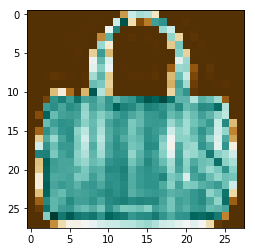

In [0]:
plt.imshow(x_train[4000], cmap='BrBG')

In [0]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [0]:
x_train = np.expand_dims(x_train, axis=3)

In [0]:
def create_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))

  model.summary()

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)

generator = create_generator()
z = Input(shape=(100,))
img = generator(z)





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)         

In [0]:
def create_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [0]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [0]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.916804, acc.: 32.81%] [G loss: 0.622842]


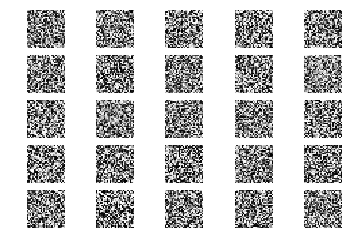

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.553384, acc.: 62.50%] [G loss: 0.679642]
2 [D loss: 0.429656, acc.: 71.88%] [G loss: 0.721941]
3 [D loss: 0.352789, acc.: 82.81%] [G loss: 0.850375]
4 [D loss: 0.329894, acc.: 81.25%] [G loss: 1.009063]
5 [D loss: 0.292943, acc.: 89.06%] [G loss: 1.104319]
6 [D loss: 0.238001, acc.: 98.44%] [G loss: 1.174199]
7 [D loss: 0.214612, acc.: 100.00%] [G loss: 1.284042]
8 [D loss: 0.193081, acc.: 98.44%] [G loss: 1.415482]
9 [D loss: 0.177792, acc.: 98.44%] [G loss: 1.522096]
10 [D loss: 0.151770, acc.: 100.00%] [G loss: 1.615600]
11 [D loss: 0.134465, acc.: 98.44%] [G loss: 1.729884]
12 [D loss: 0.155434, acc.: 100.00%] [G loss: 1.734605]
13 [D loss: 0.125494, acc.: 100.00%] [G loss: 1.724819]
14 [D loss: 0.112264, acc.: 100.00%] [G loss: 1.855506]
15 [D loss: 0.116919, acc.: 100.00%] [G loss: 2.004998]
16 [D loss: 0.103883, acc.: 100.00%] [G loss: 2.043254]
17 [D loss: 0.098122, acc.: 100.00%] [G loss: 2.118555]
18 [D loss: 0.077094, acc.: 100.00%] [G loss: 2.272886]
19 [D loss

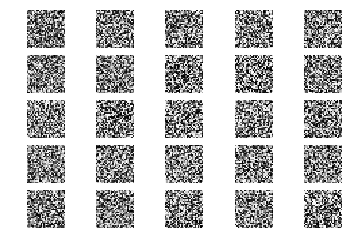

51 [D loss: 0.024424, acc.: 100.00%] [G loss: 3.340470]
52 [D loss: 0.026937, acc.: 100.00%] [G loss: 3.490183]
53 [D loss: 0.023218, acc.: 100.00%] [G loss: 3.436085]
54 [D loss: 0.023921, acc.: 100.00%] [G loss: 3.500026]
55 [D loss: 0.024027, acc.: 100.00%] [G loss: 3.537914]
56 [D loss: 0.024178, acc.: 100.00%] [G loss: 3.754274]
57 [D loss: 0.033343, acc.: 100.00%] [G loss: 3.541639]
58 [D loss: 0.033937, acc.: 100.00%] [G loss: 3.484436]
59 [D loss: 0.027091, acc.: 100.00%] [G loss: 3.532422]
60 [D loss: 0.018673, acc.: 100.00%] [G loss: 3.744750]
61 [D loss: 0.018005, acc.: 100.00%] [G loss: 3.718340]
62 [D loss: 0.021474, acc.: 100.00%] [G loss: 3.609766]
63 [D loss: 0.050842, acc.: 98.44%] [G loss: 3.644135]
64 [D loss: 0.016507, acc.: 100.00%] [G loss: 3.550920]
65 [D loss: 0.023313, acc.: 100.00%] [G loss: 3.679496]
66 [D loss: 0.027662, acc.: 100.00%] [G loss: 3.645229]
67 [D loss: 0.026524, acc.: 100.00%] [G loss: 3.721335]
68 [D loss: 0.019240, acc.: 100.00%] [G loss: 3.7

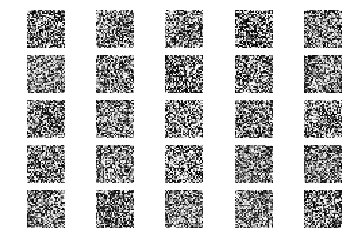

101 [D loss: 0.019774, acc.: 100.00%] [G loss: 4.337981]
102 [D loss: 0.015781, acc.: 100.00%] [G loss: 4.356334]
103 [D loss: 0.017708, acc.: 100.00%] [G loss: 4.433038]
104 [D loss: 0.025577, acc.: 100.00%] [G loss: 4.387658]
105 [D loss: 0.023211, acc.: 100.00%] [G loss: 4.585586]
106 [D loss: 0.020817, acc.: 100.00%] [G loss: 4.387579]
107 [D loss: 0.012734, acc.: 100.00%] [G loss: 4.366377]
108 [D loss: 0.022375, acc.: 100.00%] [G loss: 4.281540]
109 [D loss: 0.023220, acc.: 100.00%] [G loss: 4.428320]
110 [D loss: 0.014995, acc.: 100.00%] [G loss: 4.487417]
111 [D loss: 0.016353, acc.: 100.00%] [G loss: 4.494344]
112 [D loss: 0.019416, acc.: 100.00%] [G loss: 4.613245]
113 [D loss: 0.020607, acc.: 100.00%] [G loss: 4.549584]
114 [D loss: 0.013814, acc.: 100.00%] [G loss: 4.776841]
115 [D loss: 0.018891, acc.: 100.00%] [G loss: 4.295783]
116 [D loss: 0.016309, acc.: 100.00%] [G loss: 4.273900]
117 [D loss: 0.015777, acc.: 100.00%] [G loss: 4.356029]
118 [D loss: 0.037178, acc.: 10

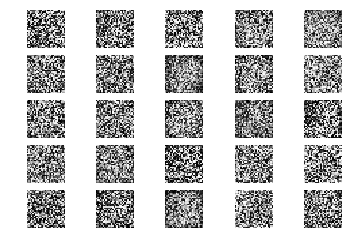

151 [D loss: 0.028975, acc.: 100.00%] [G loss: 4.919696]
152 [D loss: 0.107462, acc.: 96.88%] [G loss: 3.961727]
153 [D loss: 0.133172, acc.: 95.31%] [G loss: 3.502524]
154 [D loss: 0.089958, acc.: 96.88%] [G loss: 4.190186]
155 [D loss: 0.024010, acc.: 100.00%] [G loss: 4.764894]
156 [D loss: 0.073708, acc.: 98.44%] [G loss: 4.228111]
157 [D loss: 0.022702, acc.: 100.00%] [G loss: 4.548476]
158 [D loss: 0.042776, acc.: 98.44%] [G loss: 4.733640]
159 [D loss: 0.018074, acc.: 100.00%] [G loss: 5.129850]
160 [D loss: 0.018352, acc.: 100.00%] [G loss: 4.897108]
161 [D loss: 0.023461, acc.: 100.00%] [G loss: 4.489780]
162 [D loss: 0.021540, acc.: 100.00%] [G loss: 4.500059]
163 [D loss: 0.026788, acc.: 100.00%] [G loss: 4.323357]
164 [D loss: 0.032569, acc.: 100.00%] [G loss: 4.470783]
165 [D loss: 0.034682, acc.: 100.00%] [G loss: 4.476904]
166 [D loss: 0.022161, acc.: 100.00%] [G loss: 4.430608]
167 [D loss: 0.016958, acc.: 100.00%] [G loss: 4.493011]
168 [D loss: 0.034107, acc.: 100.00%

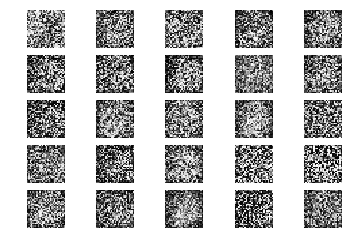

201 [D loss: 0.096297, acc.: 96.88%] [G loss: 4.519259]
202 [D loss: 0.144698, acc.: 96.88%] [G loss: 4.195685]
203 [D loss: 0.059767, acc.: 98.44%] [G loss: 4.459484]
204 [D loss: 0.144560, acc.: 92.19%] [G loss: 4.589242]
205 [D loss: 0.049144, acc.: 100.00%] [G loss: 4.747885]
206 [D loss: 0.154552, acc.: 93.75%] [G loss: 3.735753]
207 [D loss: 0.055403, acc.: 98.44%] [G loss: 4.016790]
208 [D loss: 0.112826, acc.: 95.31%] [G loss: 4.594845]
209 [D loss: 0.116068, acc.: 96.88%] [G loss: 3.755606]
210 [D loss: 0.227914, acc.: 89.06%] [G loss: 3.619758]
211 [D loss: 0.254340, acc.: 89.06%] [G loss: 4.828439]
212 [D loss: 0.190677, acc.: 98.44%] [G loss: 5.006795]
213 [D loss: 0.223646, acc.: 93.75%] [G loss: 3.775209]
214 [D loss: 0.175923, acc.: 96.88%] [G loss: 4.819369]
215 [D loss: 0.168202, acc.: 96.88%] [G loss: 4.039650]
216 [D loss: 0.103701, acc.: 95.31%] [G loss: 4.117149]
217 [D loss: 0.149313, acc.: 92.19%] [G loss: 4.097482]
218 [D loss: 0.085687, acc.: 98.44%] [G loss: 4

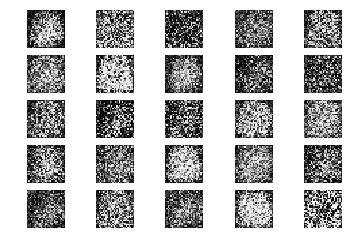

251 [D loss: 0.076513, acc.: 100.00%] [G loss: 3.774780]
252 [D loss: 0.168354, acc.: 95.31%] [G loss: 3.928845]
253 [D loss: 0.399784, acc.: 82.81%] [G loss: 3.432881]
254 [D loss: 0.102191, acc.: 95.31%] [G loss: 4.558049]
255 [D loss: 0.494740, acc.: 73.44%] [G loss: 3.105441]
256 [D loss: 0.323270, acc.: 79.69%] [G loss: 4.283627]
257 [D loss: 0.293498, acc.: 87.50%] [G loss: 3.785544]
258 [D loss: 0.250667, acc.: 90.62%] [G loss: 3.182881]
259 [D loss: 0.313980, acc.: 79.69%] [G loss: 2.997619]
260 [D loss: 0.178684, acc.: 93.75%] [G loss: 3.311755]
261 [D loss: 0.466879, acc.: 73.44%] [G loss: 2.724936]
262 [D loss: 0.141087, acc.: 93.75%] [G loss: 3.889644]
263 [D loss: 0.591285, acc.: 67.19%] [G loss: 4.354980]
264 [D loss: 0.363597, acc.: 81.25%] [G loss: 3.386094]
265 [D loss: 0.125945, acc.: 98.44%] [G loss: 3.805434]
266 [D loss: 0.226665, acc.: 93.75%] [G loss: 3.284066]
267 [D loss: 0.313975, acc.: 85.94%] [G loss: 3.101700]
268 [D loss: 0.243476, acc.: 87.50%] [G loss: 4

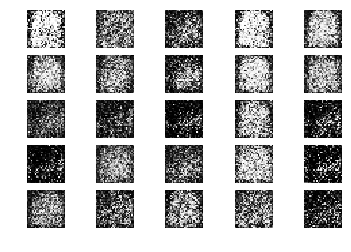

301 [D loss: 0.205882, acc.: 95.31%] [G loss: 2.859255]
302 [D loss: 0.292784, acc.: 92.19%] [G loss: 2.689594]
303 [D loss: 0.381368, acc.: 85.94%] [G loss: 2.433597]
304 [D loss: 0.403683, acc.: 84.38%] [G loss: 2.719312]
305 [D loss: 0.113896, acc.: 100.00%] [G loss: 3.365859]
306 [D loss: 0.709405, acc.: 78.12%] [G loss: 2.158312]
307 [D loss: 0.292959, acc.: 87.50%] [G loss: 2.430172]
308 [D loss: 0.231146, acc.: 93.75%] [G loss: 2.753522]
309 [D loss: 0.620073, acc.: 67.19%] [G loss: 2.163741]
310 [D loss: 0.311228, acc.: 87.50%] [G loss: 2.782119]
311 [D loss: 0.593974, acc.: 82.81%] [G loss: 2.735890]
312 [D loss: 0.351648, acc.: 84.38%] [G loss: 2.454217]
313 [D loss: 0.536975, acc.: 75.00%] [G loss: 2.584648]
314 [D loss: 0.484316, acc.: 79.69%] [G loss: 2.741012]
315 [D loss: 0.349914, acc.: 84.38%] [G loss: 2.644581]
316 [D loss: 0.436965, acc.: 79.69%] [G loss: 2.152747]
317 [D loss: 0.450394, acc.: 79.69%] [G loss: 2.076585]
318 [D loss: 0.412189, acc.: 76.56%] [G loss: 2

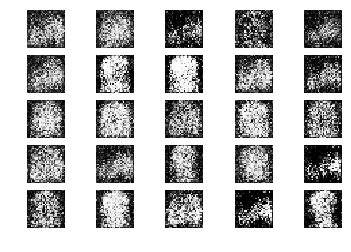

351 [D loss: 0.661124, acc.: 68.75%] [G loss: 1.878166]
352 [D loss: 0.359414, acc.: 87.50%] [G loss: 2.286487]
353 [D loss: 0.445475, acc.: 76.56%] [G loss: 1.932295]
354 [D loss: 0.624528, acc.: 67.19%] [G loss: 1.883251]
355 [D loss: 0.382283, acc.: 85.94%] [G loss: 2.412773]
356 [D loss: 0.818395, acc.: 54.69%] [G loss: 1.710952]
357 [D loss: 0.583644, acc.: 76.56%] [G loss: 1.953342]
358 [D loss: 0.589692, acc.: 68.75%] [G loss: 2.030098]
359 [D loss: 0.386540, acc.: 81.25%] [G loss: 2.091877]
360 [D loss: 0.566496, acc.: 71.88%] [G loss: 1.789187]
361 [D loss: 0.713474, acc.: 59.38%] [G loss: 1.615874]
362 [D loss: 0.746408, acc.: 65.62%] [G loss: 2.050780]
363 [D loss: 0.467007, acc.: 79.69%] [G loss: 1.996341]
364 [D loss: 0.529432, acc.: 70.31%] [G loss: 1.991170]
365 [D loss: 0.641782, acc.: 64.06%] [G loss: 1.731212]
366 [D loss: 0.460292, acc.: 68.75%] [G loss: 1.879514]
367 [D loss: 0.481429, acc.: 82.81%] [G loss: 2.084645]
368 [D loss: 0.515921, acc.: 75.00%] [G loss: 1.

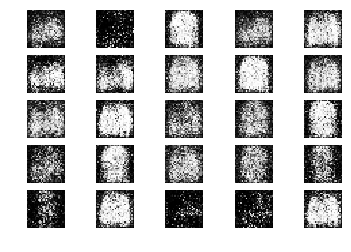

401 [D loss: 0.562699, acc.: 67.19%] [G loss: 1.288843]
402 [D loss: 0.777527, acc.: 64.06%] [G loss: 1.189916]
403 [D loss: 0.570389, acc.: 68.75%] [G loss: 1.412108]
404 [D loss: 0.618592, acc.: 62.50%] [G loss: 1.472109]
405 [D loss: 0.813852, acc.: 57.81%] [G loss: 1.229212]
406 [D loss: 0.612311, acc.: 64.06%] [G loss: 1.392218]
407 [D loss: 0.688163, acc.: 64.06%] [G loss: 1.504721]
408 [D loss: 0.685006, acc.: 62.50%] [G loss: 1.218556]
409 [D loss: 0.605727, acc.: 71.88%] [G loss: 1.169351]
410 [D loss: 0.699434, acc.: 60.94%] [G loss: 1.232908]
411 [D loss: 0.674572, acc.: 76.56%] [G loss: 1.277433]
412 [D loss: 0.959885, acc.: 37.50%] [G loss: 1.106874]
413 [D loss: 0.571145, acc.: 68.75%] [G loss: 1.153519]
414 [D loss: 0.527006, acc.: 78.12%] [G loss: 1.424955]
415 [D loss: 0.591501, acc.: 76.56%] [G loss: 1.429700]
416 [D loss: 0.620169, acc.: 70.31%] [G loss: 1.398917]
417 [D loss: 0.515683, acc.: 75.00%] [G loss: 1.310358]
418 [D loss: 0.560407, acc.: 73.44%] [G loss: 1.

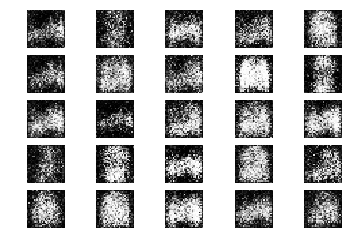

451 [D loss: 0.637024, acc.: 67.19%] [G loss: 1.051685]
452 [D loss: 0.657596, acc.: 65.62%] [G loss: 1.012991]
453 [D loss: 0.573488, acc.: 68.75%] [G loss: 1.133171]
454 [D loss: 0.708107, acc.: 59.38%] [G loss: 1.117063]
455 [D loss: 0.559028, acc.: 68.75%] [G loss: 1.128395]
456 [D loss: 0.700747, acc.: 59.38%] [G loss: 1.145322]
457 [D loss: 0.575673, acc.: 70.31%] [G loss: 1.165128]
458 [D loss: 0.703202, acc.: 60.94%] [G loss: 1.133195]
459 [D loss: 0.594845, acc.: 64.06%] [G loss: 1.212474]
460 [D loss: 0.615234, acc.: 73.44%] [G loss: 1.286086]
461 [D loss: 0.667520, acc.: 67.19%] [G loss: 1.137778]
462 [D loss: 0.560645, acc.: 73.44%] [G loss: 1.139750]
463 [D loss: 0.679704, acc.: 65.62%] [G loss: 1.267631]
464 [D loss: 0.576449, acc.: 71.88%] [G loss: 1.335180]
465 [D loss: 0.583214, acc.: 78.12%] [G loss: 1.145016]
466 [D loss: 0.631810, acc.: 71.88%] [G loss: 1.085423]
467 [D loss: 0.658444, acc.: 56.25%] [G loss: 1.309567]
468 [D loss: 0.575639, acc.: 68.75%] [G loss: 1.

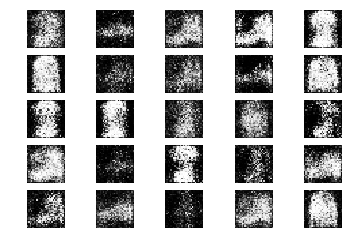

501 [D loss: 0.621972, acc.: 70.31%] [G loss: 1.088996]
502 [D loss: 0.764029, acc.: 56.25%] [G loss: 1.029356]
503 [D loss: 0.660469, acc.: 60.94%] [G loss: 0.971045]
504 [D loss: 0.616245, acc.: 68.75%] [G loss: 1.123977]
505 [D loss: 0.569362, acc.: 73.44%] [G loss: 1.324675]
506 [D loss: 0.561801, acc.: 64.06%] [G loss: 1.151267]
507 [D loss: 0.603030, acc.: 68.75%] [G loss: 1.120302]
508 [D loss: 0.660974, acc.: 56.25%] [G loss: 0.999133]
509 [D loss: 0.628302, acc.: 70.31%] [G loss: 1.002222]
510 [D loss: 0.513728, acc.: 73.44%] [G loss: 1.230757]
511 [D loss: 0.645314, acc.: 59.38%] [G loss: 1.098640]
512 [D loss: 0.586425, acc.: 73.44%] [G loss: 1.043133]
513 [D loss: 0.579615, acc.: 68.75%] [G loss: 1.143719]
514 [D loss: 0.526039, acc.: 81.25%] [G loss: 1.153257]
515 [D loss: 0.605865, acc.: 71.88%] [G loss: 1.036570]
516 [D loss: 0.621122, acc.: 73.44%] [G loss: 1.010951]
517 [D loss: 0.562649, acc.: 70.31%] [G loss: 1.096975]
518 [D loss: 0.643594, acc.: 68.75%] [G loss: 1.

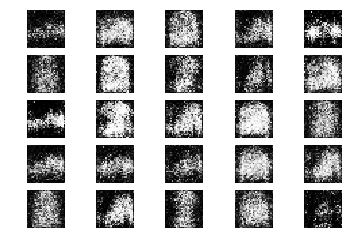

551 [D loss: 0.648399, acc.: 54.69%] [G loss: 1.113885]
552 [D loss: 0.579173, acc.: 70.31%] [G loss: 1.110952]
553 [D loss: 0.508561, acc.: 79.69%] [G loss: 1.035259]
554 [D loss: 0.534783, acc.: 75.00%] [G loss: 1.069996]
555 [D loss: 0.625643, acc.: 64.06%] [G loss: 1.117322]
556 [D loss: 0.631035, acc.: 57.81%] [G loss: 1.073463]
557 [D loss: 0.554163, acc.: 76.56%] [G loss: 1.141243]
558 [D loss: 0.640138, acc.: 65.62%] [G loss: 1.146762]
559 [D loss: 0.592020, acc.: 75.00%] [G loss: 1.148404]
560 [D loss: 0.679761, acc.: 53.12%] [G loss: 1.032253]
561 [D loss: 0.542760, acc.: 75.00%] [G loss: 1.072758]
562 [D loss: 0.566242, acc.: 68.75%] [G loss: 1.113550]
563 [D loss: 0.545308, acc.: 73.44%] [G loss: 1.034395]
564 [D loss: 0.609579, acc.: 64.06%] [G loss: 0.977570]
565 [D loss: 0.548365, acc.: 76.56%] [G loss: 1.120381]
566 [D loss: 0.507382, acc.: 81.25%] [G loss: 1.200207]
567 [D loss: 0.458108, acc.: 89.06%] [G loss: 1.186459]
568 [D loss: 0.599494, acc.: 71.88%] [G loss: 1.

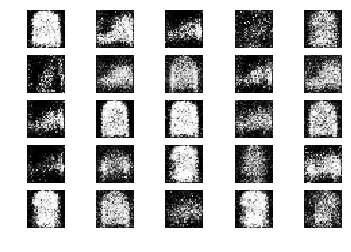

601 [D loss: 0.610516, acc.: 68.75%] [G loss: 0.963735]
602 [D loss: 0.594900, acc.: 62.50%] [G loss: 1.010210]
603 [D loss: 0.598036, acc.: 71.88%] [G loss: 1.008866]
604 [D loss: 0.607120, acc.: 64.06%] [G loss: 1.007182]
605 [D loss: 0.556360, acc.: 68.75%] [G loss: 1.096428]
606 [D loss: 0.503971, acc.: 78.12%] [G loss: 1.136076]
607 [D loss: 0.599476, acc.: 67.19%] [G loss: 1.083875]
608 [D loss: 0.642455, acc.: 60.94%] [G loss: 1.105539]
609 [D loss: 0.565355, acc.: 67.19%] [G loss: 1.026075]
610 [D loss: 0.679741, acc.: 57.81%] [G loss: 1.014913]
611 [D loss: 0.506827, acc.: 73.44%] [G loss: 1.116379]
612 [D loss: 0.495188, acc.: 79.69%] [G loss: 1.143474]
613 [D loss: 0.628699, acc.: 60.94%] [G loss: 1.059296]
614 [D loss: 0.600831, acc.: 62.50%] [G loss: 0.989862]
615 [D loss: 0.540419, acc.: 71.88%] [G loss: 0.986930]
616 [D loss: 0.546115, acc.: 75.00%] [G loss: 1.072661]
617 [D loss: 0.506607, acc.: 78.12%] [G loss: 0.927744]
618 [D loss: 0.610258, acc.: 65.62%] [G loss: 1.

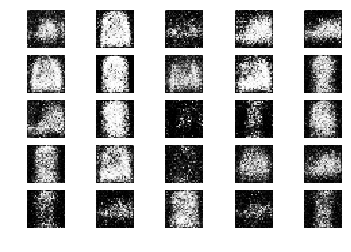

651 [D loss: 0.539471, acc.: 76.56%] [G loss: 1.068124]
652 [D loss: 0.573766, acc.: 65.62%] [G loss: 1.011234]
653 [D loss: 0.668999, acc.: 59.38%] [G loss: 0.953835]
654 [D loss: 0.537149, acc.: 76.56%] [G loss: 1.013320]
655 [D loss: 0.576864, acc.: 62.50%] [G loss: 1.053679]
656 [D loss: 0.595101, acc.: 71.88%] [G loss: 1.079786]
657 [D loss: 0.556556, acc.: 73.44%] [G loss: 1.246511]
658 [D loss: 0.575528, acc.: 75.00%] [G loss: 1.175178]
659 [D loss: 0.527995, acc.: 78.12%] [G loss: 1.107579]
660 [D loss: 0.535182, acc.: 71.88%] [G loss: 1.029586]
661 [D loss: 0.597065, acc.: 67.19%] [G loss: 1.030586]
662 [D loss: 0.536623, acc.: 76.56%] [G loss: 1.096629]
663 [D loss: 0.578489, acc.: 75.00%] [G loss: 1.173158]
664 [D loss: 0.542441, acc.: 78.12%] [G loss: 1.133178]
665 [D loss: 0.562402, acc.: 75.00%] [G loss: 1.210701]
666 [D loss: 0.595239, acc.: 68.75%] [G loss: 1.022389]
667 [D loss: 0.578862, acc.: 65.62%] [G loss: 1.126069]
668 [D loss: 0.547743, acc.: 75.00%] [G loss: 1.

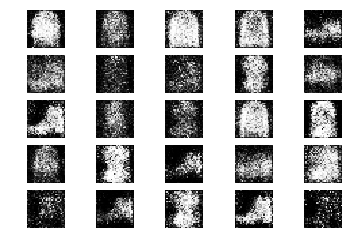

701 [D loss: 0.579645, acc.: 71.88%] [G loss: 1.150370]
702 [D loss: 0.567260, acc.: 70.31%] [G loss: 0.990923]
703 [D loss: 0.511054, acc.: 82.81%] [G loss: 1.003326]
704 [D loss: 0.480253, acc.: 78.12%] [G loss: 1.146867]
705 [D loss: 0.566888, acc.: 70.31%] [G loss: 1.212520]
706 [D loss: 0.536009, acc.: 76.56%] [G loss: 1.091125]
707 [D loss: 0.488711, acc.: 81.25%] [G loss: 1.151133]
708 [D loss: 0.649442, acc.: 57.81%] [G loss: 1.151650]
709 [D loss: 0.539829, acc.: 73.44%] [G loss: 1.003506]
710 [D loss: 0.527319, acc.: 78.12%] [G loss: 1.254299]
711 [D loss: 0.635718, acc.: 64.06%] [G loss: 0.962336]
712 [D loss: 0.621864, acc.: 64.06%] [G loss: 0.934760]
713 [D loss: 0.588309, acc.: 73.44%] [G loss: 1.050660]
714 [D loss: 0.563398, acc.: 81.25%] [G loss: 1.025831]
715 [D loss: 0.515706, acc.: 75.00%] [G loss: 1.099723]
716 [D loss: 0.462745, acc.: 82.81%] [G loss: 1.100076]
717 [D loss: 0.518570, acc.: 76.56%] [G loss: 1.143663]
718 [D loss: 0.629984, acc.: 67.19%] [G loss: 1.

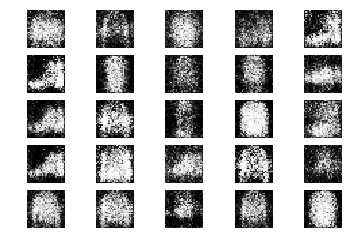

751 [D loss: 0.534962, acc.: 70.31%] [G loss: 1.022142]
752 [D loss: 0.610043, acc.: 60.94%] [G loss: 0.969503]
753 [D loss: 0.634367, acc.: 59.38%] [G loss: 1.014930]
754 [D loss: 0.582480, acc.: 64.06%] [G loss: 1.038146]
755 [D loss: 0.618905, acc.: 65.62%] [G loss: 0.899747]
756 [D loss: 0.596529, acc.: 56.25%] [G loss: 0.947791]
757 [D loss: 0.565965, acc.: 76.56%] [G loss: 0.992771]
758 [D loss: 0.566722, acc.: 68.75%] [G loss: 1.084920]
759 [D loss: 0.482860, acc.: 82.81%] [G loss: 1.134681]
760 [D loss: 0.594823, acc.: 67.19%] [G loss: 0.988560]
761 [D loss: 0.624027, acc.: 60.94%] [G loss: 1.084549]
762 [D loss: 0.532146, acc.: 71.88%] [G loss: 1.127596]
763 [D loss: 0.561663, acc.: 76.56%] [G loss: 0.972524]
764 [D loss: 0.650993, acc.: 62.50%] [G loss: 1.002780]
765 [D loss: 0.613959, acc.: 64.06%] [G loss: 1.213365]
766 [D loss: 0.613321, acc.: 65.62%] [G loss: 1.062202]
767 [D loss: 0.617174, acc.: 60.94%] [G loss: 1.063716]
768 [D loss: 0.545687, acc.: 71.88%] [G loss: 1.

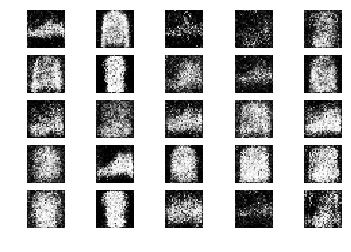

801 [D loss: 0.590484, acc.: 71.88%] [G loss: 1.008507]
802 [D loss: 0.597674, acc.: 71.88%] [G loss: 0.952775]
803 [D loss: 0.588392, acc.: 70.31%] [G loss: 0.990186]
804 [D loss: 0.596758, acc.: 67.19%] [G loss: 1.024433]
805 [D loss: 0.494038, acc.: 79.69%] [G loss: 0.989122]
806 [D loss: 0.687726, acc.: 64.06%] [G loss: 1.013955]
807 [D loss: 0.597513, acc.: 68.75%] [G loss: 1.094818]
808 [D loss: 0.547818, acc.: 75.00%] [G loss: 1.060605]
809 [D loss: 0.581409, acc.: 75.00%] [G loss: 1.095787]
810 [D loss: 0.585397, acc.: 71.88%] [G loss: 1.081917]
811 [D loss: 0.550802, acc.: 73.44%] [G loss: 1.087840]
812 [D loss: 0.588668, acc.: 67.19%] [G loss: 1.015612]
813 [D loss: 0.481643, acc.: 82.81%] [G loss: 0.968862]
814 [D loss: 0.656636, acc.: 62.50%] [G loss: 1.009332]
815 [D loss: 0.554724, acc.: 76.56%] [G loss: 1.033045]
816 [D loss: 0.606328, acc.: 59.38%] [G loss: 0.988562]
817 [D loss: 0.591909, acc.: 64.06%] [G loss: 0.960500]
818 [D loss: 0.570272, acc.: 79.69%] [G loss: 1.

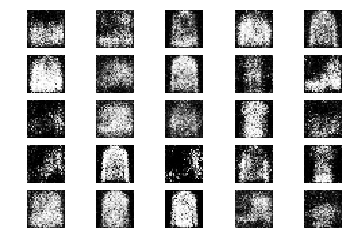

851 [D loss: 0.575618, acc.: 75.00%] [G loss: 1.081409]
852 [D loss: 0.572468, acc.: 70.31%] [G loss: 1.015572]
853 [D loss: 0.618901, acc.: 68.75%] [G loss: 0.941772]
854 [D loss: 0.567481, acc.: 73.44%] [G loss: 1.023999]
855 [D loss: 0.558972, acc.: 70.31%] [G loss: 1.014442]
856 [D loss: 0.539831, acc.: 68.75%] [G loss: 0.944912]
857 [D loss: 0.549410, acc.: 78.12%] [G loss: 1.081682]
858 [D loss: 0.636900, acc.: 68.75%] [G loss: 0.957646]
859 [D loss: 0.608309, acc.: 64.06%] [G loss: 0.893815]
860 [D loss: 0.605633, acc.: 64.06%] [G loss: 0.918697]
861 [D loss: 0.603853, acc.: 68.75%] [G loss: 0.955611]
862 [D loss: 0.595347, acc.: 75.00%] [G loss: 0.943894]
863 [D loss: 0.615484, acc.: 64.06%] [G loss: 0.928768]
864 [D loss: 0.605557, acc.: 65.62%] [G loss: 0.916854]
865 [D loss: 0.654625, acc.: 67.19%] [G loss: 0.919378]
866 [D loss: 0.506238, acc.: 79.69%] [G loss: 1.174893]
867 [D loss: 0.541927, acc.: 67.19%] [G loss: 1.189473]
868 [D loss: 0.547912, acc.: 71.88%] [G loss: 1.

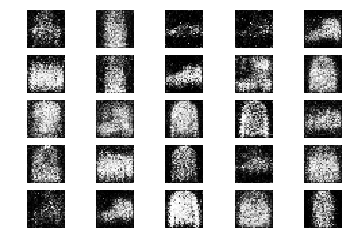

901 [D loss: 0.484991, acc.: 76.56%] [G loss: 0.974179]
902 [D loss: 0.552776, acc.: 73.44%] [G loss: 0.934910]
903 [D loss: 0.639059, acc.: 60.94%] [G loss: 0.902460]
904 [D loss: 0.651206, acc.: 65.62%] [G loss: 0.879625]
905 [D loss: 0.591002, acc.: 64.06%] [G loss: 1.031360]
906 [D loss: 0.679232, acc.: 59.38%] [G loss: 1.049381]
907 [D loss: 0.622986, acc.: 68.75%] [G loss: 0.989325]
908 [D loss: 0.659774, acc.: 60.94%] [G loss: 0.974972]
909 [D loss: 0.577439, acc.: 75.00%] [G loss: 0.936330]
910 [D loss: 0.563862, acc.: 71.88%] [G loss: 0.913351]
911 [D loss: 0.613073, acc.: 65.62%] [G loss: 0.979723]
912 [D loss: 0.532542, acc.: 71.88%] [G loss: 1.143077]
913 [D loss: 0.625508, acc.: 62.50%] [G loss: 1.040952]
914 [D loss: 0.571364, acc.: 68.75%] [G loss: 1.050252]
915 [D loss: 0.657356, acc.: 65.62%] [G loss: 0.973503]
916 [D loss: 0.512261, acc.: 76.56%] [G loss: 1.022178]
917 [D loss: 0.653373, acc.: 60.94%] [G loss: 1.006620]
918 [D loss: 0.629319, acc.: 64.06%] [G loss: 1.

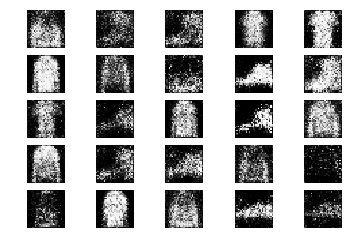

951 [D loss: 0.637072, acc.: 62.50%] [G loss: 0.968480]
952 [D loss: 0.636744, acc.: 60.94%] [G loss: 0.931735]
953 [D loss: 0.667638, acc.: 64.06%] [G loss: 1.064971]
954 [D loss: 0.584230, acc.: 64.06%] [G loss: 1.012041]
955 [D loss: 0.634550, acc.: 60.94%] [G loss: 1.009155]
956 [D loss: 0.619466, acc.: 64.06%] [G loss: 1.000508]
957 [D loss: 0.635899, acc.: 59.38%] [G loss: 1.067391]
958 [D loss: 0.538378, acc.: 71.88%] [G loss: 1.013826]
959 [D loss: 0.549805, acc.: 75.00%] [G loss: 1.035283]
960 [D loss: 0.570890, acc.: 68.75%] [G loss: 1.022420]
961 [D loss: 0.487126, acc.: 79.69%] [G loss: 1.096292]
962 [D loss: 0.569387, acc.: 67.19%] [G loss: 1.035180]
963 [D loss: 0.667795, acc.: 60.94%] [G loss: 1.035248]
964 [D loss: 0.555026, acc.: 78.12%] [G loss: 1.113994]
965 [D loss: 0.634621, acc.: 60.94%] [G loss: 1.059459]
966 [D loss: 0.545537, acc.: 68.75%] [G loss: 1.005160]
967 [D loss: 0.577110, acc.: 68.75%] [G loss: 1.008186]
968 [D loss: 0.716733, acc.: 50.00%] [G loss: 0.

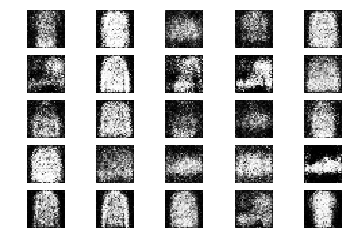

1001 [D loss: 0.660368, acc.: 57.81%] [G loss: 1.067012]
1002 [D loss: 0.647428, acc.: 62.50%] [G loss: 0.944342]
1003 [D loss: 0.618041, acc.: 71.88%] [G loss: 0.859111]
1004 [D loss: 0.604182, acc.: 67.19%] [G loss: 0.846738]
1005 [D loss: 0.592816, acc.: 68.75%] [G loss: 0.864789]
1006 [D loss: 0.526391, acc.: 76.56%] [G loss: 0.954025]
1007 [D loss: 0.658320, acc.: 62.50%] [G loss: 0.916716]
1008 [D loss: 0.573929, acc.: 68.75%] [G loss: 0.913554]
1009 [D loss: 0.596262, acc.: 68.75%] [G loss: 0.930785]
1010 [D loss: 0.662450, acc.: 68.75%] [G loss: 0.924131]
1011 [D loss: 0.601399, acc.: 68.75%] [G loss: 0.964742]
1012 [D loss: 0.435189, acc.: 84.38%] [G loss: 1.057844]
1013 [D loss: 0.641126, acc.: 68.75%] [G loss: 1.098887]
1014 [D loss: 0.585959, acc.: 62.50%] [G loss: 0.998178]
1015 [D loss: 0.571366, acc.: 68.75%] [G loss: 0.905447]
1016 [D loss: 0.643800, acc.: 65.62%] [G loss: 0.906576]
1017 [D loss: 0.619081, acc.: 67.19%] [G loss: 0.961100]
1018 [D loss: 0.624484, acc.: 6

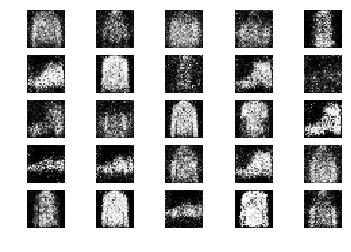

1051 [D loss: 0.555747, acc.: 71.88%] [G loss: 0.983655]
1052 [D loss: 0.665366, acc.: 53.12%] [G loss: 1.101126]
1053 [D loss: 0.583053, acc.: 68.75%] [G loss: 1.024211]
1054 [D loss: 0.587961, acc.: 78.12%] [G loss: 1.027932]
1055 [D loss: 0.591973, acc.: 62.50%] [G loss: 0.984977]
1056 [D loss: 0.550440, acc.: 70.31%] [G loss: 1.000528]
1057 [D loss: 0.557273, acc.: 70.31%] [G loss: 0.927710]
1058 [D loss: 0.565522, acc.: 70.31%] [G loss: 0.890711]
1059 [D loss: 0.612574, acc.: 67.19%] [G loss: 0.996314]
1060 [D loss: 0.587465, acc.: 68.75%] [G loss: 0.910624]
1061 [D loss: 0.614018, acc.: 71.88%] [G loss: 0.977286]
1062 [D loss: 0.606322, acc.: 64.06%] [G loss: 0.982035]
1063 [D loss: 0.683081, acc.: 64.06%] [G loss: 0.992498]
1064 [D loss: 0.726685, acc.: 50.00%] [G loss: 0.915111]
1065 [D loss: 0.601004, acc.: 71.88%] [G loss: 0.979954]
1066 [D loss: 0.645003, acc.: 65.62%] [G loss: 0.968241]
1067 [D loss: 0.560687, acc.: 75.00%] [G loss: 0.937577]
1068 [D loss: 0.582142, acc.: 6

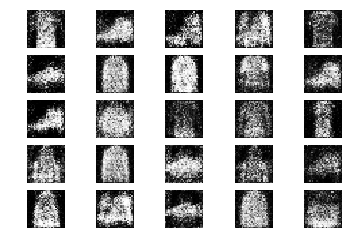

1101 [D loss: 0.617771, acc.: 67.19%] [G loss: 0.892588]
1102 [D loss: 0.542029, acc.: 76.56%] [G loss: 1.039793]
1103 [D loss: 0.525296, acc.: 82.81%] [G loss: 0.992677]
1104 [D loss: 0.645230, acc.: 65.62%] [G loss: 1.036559]
1105 [D loss: 0.641807, acc.: 64.06%] [G loss: 0.977750]
1106 [D loss: 0.655922, acc.: 54.69%] [G loss: 0.922510]
1107 [D loss: 0.572941, acc.: 67.19%] [G loss: 0.947111]
1108 [D loss: 0.601809, acc.: 67.19%] [G loss: 0.889285]
1109 [D loss: 0.615635, acc.: 60.94%] [G loss: 0.910810]
1110 [D loss: 0.666162, acc.: 59.38%] [G loss: 0.931972]
1111 [D loss: 0.604032, acc.: 65.62%] [G loss: 0.986342]
1112 [D loss: 0.562979, acc.: 71.88%] [G loss: 0.943027]
1113 [D loss: 0.609930, acc.: 65.62%] [G loss: 0.935363]
1114 [D loss: 0.634190, acc.: 62.50%] [G loss: 0.951789]
1115 [D loss: 0.649926, acc.: 60.94%] [G loss: 0.886903]
1116 [D loss: 0.642769, acc.: 60.94%] [G loss: 0.844581]
1117 [D loss: 0.599774, acc.: 68.75%] [G loss: 0.934426]
1118 [D loss: 0.513684, acc.: 8

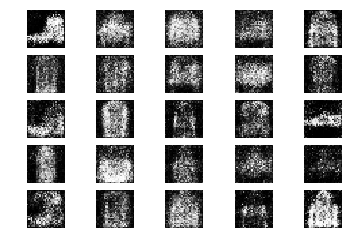

1151 [D loss: 0.610188, acc.: 60.94%] [G loss: 0.921802]
1152 [D loss: 0.647482, acc.: 67.19%] [G loss: 1.078461]
1153 [D loss: 0.646176, acc.: 64.06%] [G loss: 0.886203]
1154 [D loss: 0.563311, acc.: 71.88%] [G loss: 0.940412]
1155 [D loss: 0.638583, acc.: 62.50%] [G loss: 0.956977]
1156 [D loss: 0.544756, acc.: 75.00%] [G loss: 1.008677]
1157 [D loss: 0.592343, acc.: 65.62%] [G loss: 1.013327]
1158 [D loss: 0.603086, acc.: 64.06%] [G loss: 1.065875]
1159 [D loss: 0.570293, acc.: 70.31%] [G loss: 0.908690]
1160 [D loss: 0.560994, acc.: 71.88%] [G loss: 1.011142]
1161 [D loss: 0.621286, acc.: 62.50%] [G loss: 0.854138]
1162 [D loss: 0.667106, acc.: 57.81%] [G loss: 0.926883]
1163 [D loss: 0.655038, acc.: 60.94%] [G loss: 1.036072]
1164 [D loss: 0.576682, acc.: 64.06%] [G loss: 1.025095]
1165 [D loss: 0.593462, acc.: 68.75%] [G loss: 0.963344]
1166 [D loss: 0.622125, acc.: 65.62%] [G loss: 0.911870]
1167 [D loss: 0.563202, acc.: 73.44%] [G loss: 0.896275]
1168 [D loss: 0.563150, acc.: 6

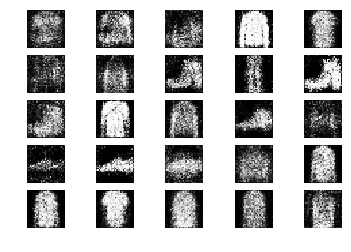

1201 [D loss: 0.535321, acc.: 75.00%] [G loss: 0.998940]
1202 [D loss: 0.618487, acc.: 64.06%] [G loss: 0.954999]
1203 [D loss: 0.570111, acc.: 70.31%] [G loss: 1.060120]
1204 [D loss: 0.720604, acc.: 60.94%] [G loss: 1.021604]
1205 [D loss: 0.664581, acc.: 60.94%] [G loss: 1.046877]
1206 [D loss: 0.683228, acc.: 59.38%] [G loss: 0.831673]
1207 [D loss: 0.680474, acc.: 46.88%] [G loss: 0.878790]
1208 [D loss: 0.615033, acc.: 64.06%] [G loss: 0.904462]
1209 [D loss: 0.556455, acc.: 71.88%] [G loss: 0.797105]
1210 [D loss: 0.571907, acc.: 73.44%] [G loss: 0.959192]
1211 [D loss: 0.557257, acc.: 76.56%] [G loss: 0.916230]
1212 [D loss: 0.549921, acc.: 76.56%] [G loss: 0.986246]
1213 [D loss: 0.601490, acc.: 65.62%] [G loss: 0.969392]
1214 [D loss: 0.639474, acc.: 60.94%] [G loss: 0.982285]
1215 [D loss: 0.580498, acc.: 67.19%] [G loss: 0.981149]
1216 [D loss: 0.627135, acc.: 65.62%] [G loss: 0.957058]
1217 [D loss: 0.641520, acc.: 59.38%] [G loss: 0.833979]
1218 [D loss: 0.566881, acc.: 7

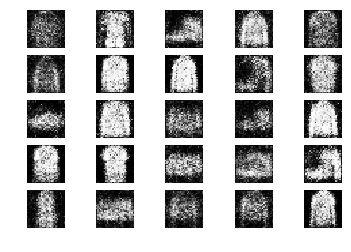

1251 [D loss: 0.571847, acc.: 71.88%] [G loss: 0.998964]
1252 [D loss: 0.600001, acc.: 65.62%] [G loss: 1.012168]
1253 [D loss: 0.535523, acc.: 73.44%] [G loss: 0.964216]
1254 [D loss: 0.555976, acc.: 67.19%] [G loss: 0.939164]
1255 [D loss: 0.540758, acc.: 78.12%] [G loss: 1.018116]
1256 [D loss: 0.589768, acc.: 65.62%] [G loss: 0.923315]
1257 [D loss: 0.610215, acc.: 68.75%] [G loss: 0.968692]
1258 [D loss: 0.664802, acc.: 64.06%] [G loss: 0.888303]
1259 [D loss: 0.568376, acc.: 70.31%] [G loss: 1.075210]
1260 [D loss: 0.656022, acc.: 67.19%] [G loss: 0.968720]
1261 [D loss: 0.588634, acc.: 67.19%] [G loss: 1.003372]
1262 [D loss: 0.583267, acc.: 71.88%] [G loss: 0.914588]
1263 [D loss: 0.596331, acc.: 65.62%] [G loss: 0.973163]
1264 [D loss: 0.551332, acc.: 76.56%] [G loss: 1.008853]
1265 [D loss: 0.604315, acc.: 73.44%] [G loss: 1.005757]
1266 [D loss: 0.577943, acc.: 68.75%] [G loss: 0.910189]
1267 [D loss: 0.546887, acc.: 78.12%] [G loss: 0.913469]
1268 [D loss: 0.606607, acc.: 7

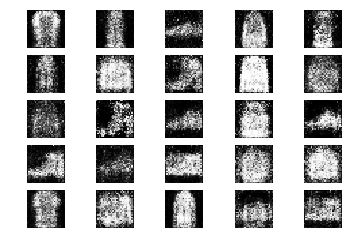

1301 [D loss: 0.663082, acc.: 67.19%] [G loss: 0.909406]
1302 [D loss: 0.650931, acc.: 68.75%] [G loss: 0.834969]
1303 [D loss: 0.563928, acc.: 76.56%] [G loss: 0.940896]
1304 [D loss: 0.561554, acc.: 71.88%] [G loss: 0.901363]
1305 [D loss: 0.548273, acc.: 78.12%] [G loss: 0.874563]
1306 [D loss: 0.598364, acc.: 68.75%] [G loss: 0.948427]
1307 [D loss: 0.615477, acc.: 64.06%] [G loss: 0.881620]
1308 [D loss: 0.586291, acc.: 70.31%] [G loss: 0.973298]
1309 [D loss: 0.544518, acc.: 73.44%] [G loss: 0.893742]
1310 [D loss: 0.604817, acc.: 67.19%] [G loss: 0.972073]
1311 [D loss: 0.602929, acc.: 65.62%] [G loss: 0.904147]
1312 [D loss: 0.649678, acc.: 60.94%] [G loss: 1.070890]
1313 [D loss: 0.637581, acc.: 60.94%] [G loss: 1.069234]
1314 [D loss: 0.604541, acc.: 71.88%] [G loss: 0.991933]
1315 [D loss: 0.693030, acc.: 54.69%] [G loss: 0.921555]
1316 [D loss: 0.624689, acc.: 60.94%] [G loss: 0.979336]
1317 [D loss: 0.629848, acc.: 65.62%] [G loss: 0.872799]
1318 [D loss: 0.690468, acc.: 5

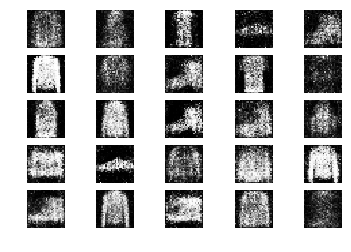

1351 [D loss: 0.605164, acc.: 68.75%] [G loss: 0.938509]
1352 [D loss: 0.566984, acc.: 67.19%] [G loss: 0.871475]
1353 [D loss: 0.687068, acc.: 59.38%] [G loss: 0.976625]
1354 [D loss: 0.535160, acc.: 75.00%] [G loss: 0.912044]
1355 [D loss: 0.636849, acc.: 56.25%] [G loss: 0.884727]
1356 [D loss: 0.670936, acc.: 59.38%] [G loss: 0.862811]
1357 [D loss: 0.667796, acc.: 56.25%] [G loss: 0.863918]
1358 [D loss: 0.572108, acc.: 79.69%] [G loss: 0.855390]
1359 [D loss: 0.622977, acc.: 67.19%] [G loss: 0.915872]
1360 [D loss: 0.557402, acc.: 70.31%] [G loss: 0.855363]
1361 [D loss: 0.472022, acc.: 84.38%] [G loss: 1.106407]
1362 [D loss: 0.627915, acc.: 60.94%] [G loss: 1.098532]
1363 [D loss: 0.646207, acc.: 57.81%] [G loss: 1.139850]
1364 [D loss: 0.585765, acc.: 70.31%] [G loss: 0.967926]
1365 [D loss: 0.629950, acc.: 65.62%] [G loss: 0.988242]
1366 [D loss: 0.731364, acc.: 50.00%] [G loss: 0.918568]
1367 [D loss: 0.599668, acc.: 68.75%] [G loss: 0.929449]
1368 [D loss: 0.564993, acc.: 7

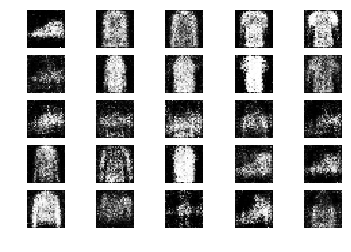

1401 [D loss: 0.677420, acc.: 60.94%] [G loss: 1.025083]
1402 [D loss: 0.612628, acc.: 67.19%] [G loss: 0.913950]
1403 [D loss: 0.591178, acc.: 70.31%] [G loss: 1.095792]
1404 [D loss: 0.600595, acc.: 70.31%] [G loss: 1.022515]
1405 [D loss: 0.566565, acc.: 68.75%] [G loss: 1.000928]
1406 [D loss: 0.636425, acc.: 67.19%] [G loss: 1.047016]
1407 [D loss: 0.596611, acc.: 68.75%] [G loss: 0.909878]
1408 [D loss: 0.592287, acc.: 76.56%] [G loss: 0.933851]
1409 [D loss: 0.633373, acc.: 67.19%] [G loss: 0.932236]
1410 [D loss: 0.665784, acc.: 60.94%] [G loss: 1.000451]
1411 [D loss: 0.697628, acc.: 54.69%] [G loss: 1.049851]
1412 [D loss: 0.565174, acc.: 73.44%] [G loss: 1.012382]
1413 [D loss: 0.592161, acc.: 78.12%] [G loss: 0.937623]
1414 [D loss: 0.587395, acc.: 73.44%] [G loss: 0.844055]
1415 [D loss: 0.596994, acc.: 73.44%] [G loss: 0.915940]
1416 [D loss: 0.650439, acc.: 67.19%] [G loss: 0.937303]
1417 [D loss: 0.672350, acc.: 60.94%] [G loss: 0.835201]
1418 [D loss: 0.527636, acc.: 7

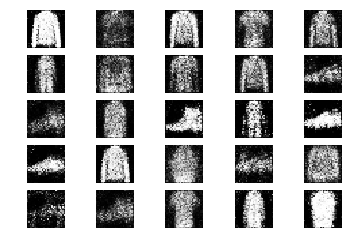

1451 [D loss: 0.641955, acc.: 60.94%] [G loss: 0.910177]
1452 [D loss: 0.598362, acc.: 64.06%] [G loss: 0.962993]
1453 [D loss: 0.611138, acc.: 68.75%] [G loss: 0.943052]
1454 [D loss: 0.685755, acc.: 53.12%] [G loss: 0.904540]
1455 [D loss: 0.623391, acc.: 59.38%] [G loss: 0.977834]
1456 [D loss: 0.594928, acc.: 73.44%] [G loss: 1.053310]
1457 [D loss: 0.564629, acc.: 68.75%] [G loss: 0.987874]
1458 [D loss: 0.590420, acc.: 70.31%] [G loss: 0.955764]
1459 [D loss: 0.617779, acc.: 65.62%] [G loss: 0.932956]
1460 [D loss: 0.633025, acc.: 62.50%] [G loss: 0.881838]
1461 [D loss: 0.570654, acc.: 70.31%] [G loss: 0.942924]
1462 [D loss: 0.729399, acc.: 48.44%] [G loss: 0.956446]
1463 [D loss: 0.616999, acc.: 64.06%] [G loss: 1.017791]
1464 [D loss: 0.604069, acc.: 67.19%] [G loss: 0.968848]
1465 [D loss: 0.620878, acc.: 68.75%] [G loss: 1.014876]
1466 [D loss: 0.590848, acc.: 67.19%] [G loss: 0.997246]
1467 [D loss: 0.695761, acc.: 54.69%] [G loss: 0.991147]
1468 [D loss: 0.635603, acc.: 6

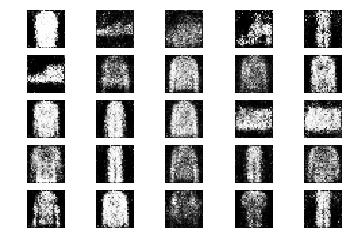

1501 [D loss: 0.693753, acc.: 64.06%] [G loss: 0.961898]
1502 [D loss: 0.680336, acc.: 56.25%] [G loss: 0.875095]
1503 [D loss: 0.634903, acc.: 64.06%] [G loss: 0.930541]
1504 [D loss: 0.563573, acc.: 67.19%] [G loss: 0.929970]
1505 [D loss: 0.543891, acc.: 71.88%] [G loss: 0.916031]
1506 [D loss: 0.683240, acc.: 54.69%] [G loss: 0.975362]
1507 [D loss: 0.646327, acc.: 62.50%] [G loss: 0.938022]
1508 [D loss: 0.697358, acc.: 46.88%] [G loss: 0.918824]
1509 [D loss: 0.582344, acc.: 70.31%] [G loss: 0.881829]
1510 [D loss: 0.653421, acc.: 62.50%] [G loss: 0.936026]
1511 [D loss: 0.599822, acc.: 62.50%] [G loss: 0.985745]
1512 [D loss: 0.577886, acc.: 67.19%] [G loss: 0.935044]
1513 [D loss: 0.556379, acc.: 70.31%] [G loss: 0.925465]
1514 [D loss: 0.664424, acc.: 60.94%] [G loss: 0.855991]
1515 [D loss: 0.576475, acc.: 70.31%] [G loss: 0.965416]
1516 [D loss: 0.669667, acc.: 56.25%] [G loss: 0.907524]
1517 [D loss: 0.595519, acc.: 70.31%] [G loss: 0.861161]
1518 [D loss: 0.568445, acc.: 7

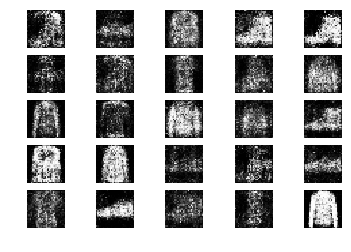

1551 [D loss: 0.630201, acc.: 57.81%] [G loss: 0.959333]
1552 [D loss: 0.656702, acc.: 65.62%] [G loss: 0.931132]
1553 [D loss: 0.722525, acc.: 53.12%] [G loss: 0.929801]
1554 [D loss: 0.654841, acc.: 51.56%] [G loss: 1.002432]
1555 [D loss: 0.654309, acc.: 60.94%] [G loss: 0.927477]
1556 [D loss: 0.609664, acc.: 62.50%] [G loss: 0.934581]
1557 [D loss: 0.537092, acc.: 78.12%] [G loss: 0.955250]
1558 [D loss: 0.582197, acc.: 70.31%] [G loss: 0.954129]
1559 [D loss: 0.598109, acc.: 71.88%] [G loss: 1.065793]
1560 [D loss: 0.594668, acc.: 64.06%] [G loss: 0.917223]
1561 [D loss: 0.683023, acc.: 53.12%] [G loss: 0.952669]
1562 [D loss: 0.632064, acc.: 64.06%] [G loss: 0.863165]
1563 [D loss: 0.575583, acc.: 71.88%] [G loss: 0.940691]
1564 [D loss: 0.654737, acc.: 60.94%] [G loss: 0.883769]
1565 [D loss: 0.618389, acc.: 67.19%] [G loss: 0.889899]
1566 [D loss: 0.547635, acc.: 75.00%] [G loss: 0.996909]
1567 [D loss: 0.583252, acc.: 67.19%] [G loss: 0.968867]
1568 [D loss: 0.592419, acc.: 6

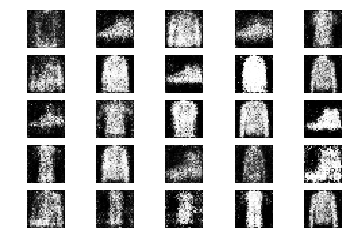

1601 [D loss: 0.678829, acc.: 59.38%] [G loss: 0.871431]
1602 [D loss: 0.622585, acc.: 67.19%] [G loss: 1.011641]
1603 [D loss: 0.610712, acc.: 67.19%] [G loss: 0.896549]
1604 [D loss: 0.627520, acc.: 68.75%] [G loss: 0.914727]
1605 [D loss: 0.570663, acc.: 81.25%] [G loss: 0.956758]
1606 [D loss: 0.628926, acc.: 60.94%] [G loss: 1.025939]
1607 [D loss: 0.638649, acc.: 60.94%] [G loss: 0.934868]
1608 [D loss: 0.619460, acc.: 73.44%] [G loss: 0.952651]
1609 [D loss: 0.647061, acc.: 57.81%] [G loss: 0.975008]
1610 [D loss: 0.581826, acc.: 75.00%] [G loss: 0.972438]
1611 [D loss: 0.607120, acc.: 71.88%] [G loss: 0.971166]
1612 [D loss: 0.578485, acc.: 71.88%] [G loss: 0.985861]
1613 [D loss: 0.554461, acc.: 76.56%] [G loss: 0.992060]
1614 [D loss: 0.627853, acc.: 65.62%] [G loss: 0.969025]
1615 [D loss: 0.642760, acc.: 59.38%] [G loss: 0.965724]
1616 [D loss: 0.587373, acc.: 76.56%] [G loss: 0.917680]
1617 [D loss: 0.599832, acc.: 57.81%] [G loss: 0.984210]
1618 [D loss: 0.556084, acc.: 7

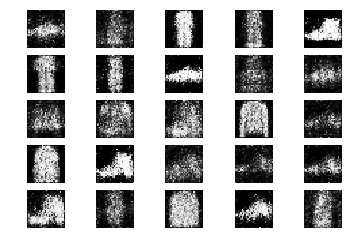

1651 [D loss: 0.548791, acc.: 73.44%] [G loss: 0.868955]
1652 [D loss: 0.552401, acc.: 75.00%] [G loss: 1.009475]
1653 [D loss: 0.594786, acc.: 70.31%] [G loss: 0.959704]
1654 [D loss: 0.595656, acc.: 68.75%] [G loss: 0.927731]
1655 [D loss: 0.623485, acc.: 70.31%] [G loss: 0.869202]
1656 [D loss: 0.617547, acc.: 65.62%] [G loss: 0.886796]
1657 [D loss: 0.636462, acc.: 62.50%] [G loss: 1.103821]
1658 [D loss: 0.580098, acc.: 70.31%] [G loss: 0.942991]
1659 [D loss: 0.600687, acc.: 65.62%] [G loss: 0.902417]
1660 [D loss: 0.606882, acc.: 64.06%] [G loss: 0.969647]
1661 [D loss: 0.547560, acc.: 68.75%] [G loss: 0.982625]
1662 [D loss: 0.659541, acc.: 60.94%] [G loss: 0.928980]
1663 [D loss: 0.614405, acc.: 67.19%] [G loss: 1.001123]
1664 [D loss: 0.599948, acc.: 71.88%] [G loss: 0.944378]
1665 [D loss: 0.519753, acc.: 75.00%] [G loss: 0.916411]
1666 [D loss: 0.562342, acc.: 78.12%] [G loss: 0.953030]
1667 [D loss: 0.640262, acc.: 70.31%] [G loss: 0.879665]
1668 [D loss: 0.592038, acc.: 6

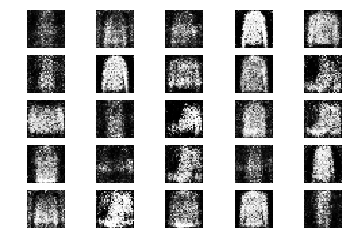

1701 [D loss: 0.577623, acc.: 73.44%] [G loss: 0.999295]
1702 [D loss: 0.672299, acc.: 62.50%] [G loss: 0.947934]
1703 [D loss: 0.636324, acc.: 59.38%] [G loss: 0.933708]
1704 [D loss: 0.642984, acc.: 64.06%] [G loss: 0.947036]
1705 [D loss: 0.595400, acc.: 68.75%] [G loss: 1.021906]
1706 [D loss: 0.560969, acc.: 70.31%] [G loss: 0.978443]
1707 [D loss: 0.626176, acc.: 65.62%] [G loss: 0.972061]
1708 [D loss: 0.552937, acc.: 73.44%] [G loss: 0.984377]
1709 [D loss: 0.648507, acc.: 56.25%] [G loss: 0.849980]
1710 [D loss: 0.686070, acc.: 56.25%] [G loss: 0.800383]
1711 [D loss: 0.579278, acc.: 68.75%] [G loss: 0.921066]
1712 [D loss: 0.653676, acc.: 57.81%] [G loss: 0.963832]
1713 [D loss: 0.492276, acc.: 75.00%] [G loss: 0.922911]
1714 [D loss: 0.544375, acc.: 71.88%] [G loss: 1.027358]
1715 [D loss: 0.572544, acc.: 70.31%] [G loss: 0.874756]
1716 [D loss: 0.576678, acc.: 60.94%] [G loss: 1.015946]
1717 [D loss: 0.582178, acc.: 67.19%] [G loss: 1.001956]
1718 [D loss: 0.581490, acc.: 6

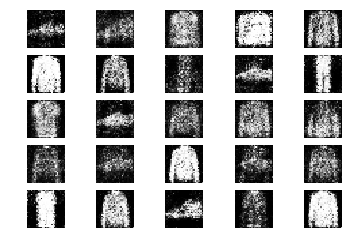

1751 [D loss: 0.614227, acc.: 70.31%] [G loss: 1.024471]
1752 [D loss: 0.593169, acc.: 73.44%] [G loss: 0.991207]
1753 [D loss: 0.642458, acc.: 68.75%] [G loss: 0.921031]
1754 [D loss: 0.613814, acc.: 68.75%] [G loss: 0.915720]
1755 [D loss: 0.570936, acc.: 67.19%] [G loss: 1.011374]
1756 [D loss: 0.585027, acc.: 67.19%] [G loss: 0.962656]
1757 [D loss: 0.591984, acc.: 60.94%] [G loss: 0.837831]
1758 [D loss: 0.576129, acc.: 78.12%] [G loss: 0.956075]
1759 [D loss: 0.669163, acc.: 62.50%] [G loss: 0.962416]
1760 [D loss: 0.675069, acc.: 57.81%] [G loss: 0.974921]
1761 [D loss: 0.615092, acc.: 65.62%] [G loss: 0.930520]
1762 [D loss: 0.633162, acc.: 65.62%] [G loss: 0.833726]
1763 [D loss: 0.579308, acc.: 73.44%] [G loss: 0.863370]
1764 [D loss: 0.541794, acc.: 76.56%] [G loss: 0.854648]
1765 [D loss: 0.562299, acc.: 76.56%] [G loss: 0.939743]
1766 [D loss: 0.625352, acc.: 60.94%] [G loss: 1.069935]
1767 [D loss: 0.605374, acc.: 67.19%] [G loss: 1.045314]
1768 [D loss: 0.658140, acc.: 5

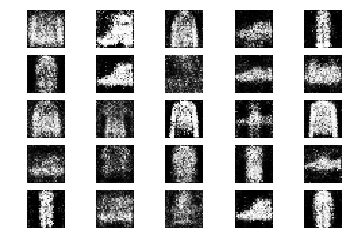

1801 [D loss: 0.547380, acc.: 71.88%] [G loss: 0.907424]
1802 [D loss: 0.619230, acc.: 70.31%] [G loss: 0.868662]
1803 [D loss: 0.584703, acc.: 70.31%] [G loss: 0.911959]
1804 [D loss: 0.574979, acc.: 71.88%] [G loss: 1.041355]
1805 [D loss: 0.615811, acc.: 68.75%] [G loss: 0.850161]
1806 [D loss: 0.618302, acc.: 62.50%] [G loss: 0.924585]
1807 [D loss: 0.583102, acc.: 73.44%] [G loss: 0.988700]
1808 [D loss: 0.629224, acc.: 67.19%] [G loss: 0.990762]
1809 [D loss: 0.602308, acc.: 70.31%] [G loss: 0.974609]
1810 [D loss: 0.608588, acc.: 65.62%] [G loss: 0.954129]
1811 [D loss: 0.635556, acc.: 60.94%] [G loss: 0.919422]
1812 [D loss: 0.558390, acc.: 75.00%] [G loss: 1.039409]
1813 [D loss: 0.597987, acc.: 67.19%] [G loss: 1.067601]
1814 [D loss: 0.574689, acc.: 75.00%] [G loss: 1.005415]
1815 [D loss: 0.616664, acc.: 62.50%] [G loss: 1.016888]
1816 [D loss: 0.573421, acc.: 68.75%] [G loss: 0.938072]
1817 [D loss: 0.582192, acc.: 68.75%] [G loss: 0.936647]
1818 [D loss: 0.633592, acc.: 6

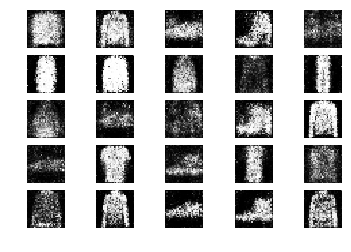

1851 [D loss: 0.518261, acc.: 79.69%] [G loss: 1.044737]
1852 [D loss: 0.546677, acc.: 68.75%] [G loss: 0.952702]
1853 [D loss: 0.653078, acc.: 59.38%] [G loss: 1.005866]
1854 [D loss: 0.629461, acc.: 65.62%] [G loss: 0.830959]
1855 [D loss: 0.608767, acc.: 65.62%] [G loss: 0.927776]
1856 [D loss: 0.651248, acc.: 59.38%] [G loss: 0.860383]
1857 [D loss: 0.657772, acc.: 56.25%] [G loss: 0.974694]
1858 [D loss: 0.606685, acc.: 65.62%] [G loss: 0.995661]
1859 [D loss: 0.608077, acc.: 64.06%] [G loss: 0.978145]
1860 [D loss: 0.703885, acc.: 50.00%] [G loss: 0.997676]
1861 [D loss: 0.628448, acc.: 67.19%] [G loss: 0.987411]
1862 [D loss: 0.617965, acc.: 62.50%] [G loss: 0.971428]
1863 [D loss: 0.647747, acc.: 62.50%] [G loss: 1.003027]
1864 [D loss: 0.600683, acc.: 60.94%] [G loss: 0.983945]
1865 [D loss: 0.588057, acc.: 68.75%] [G loss: 0.849709]
1866 [D loss: 0.640700, acc.: 62.50%] [G loss: 0.994937]
1867 [D loss: 0.615556, acc.: 67.19%] [G loss: 0.933748]
1868 [D loss: 0.533477, acc.: 7

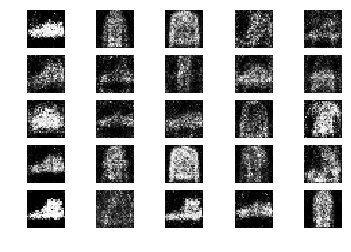

1901 [D loss: 0.509388, acc.: 76.56%] [G loss: 0.963884]
1902 [D loss: 0.659112, acc.: 59.38%] [G loss: 1.064909]
1903 [D loss: 0.569340, acc.: 71.88%] [G loss: 0.960324]
1904 [D loss: 0.604938, acc.: 68.75%] [G loss: 0.986998]
1905 [D loss: 0.621565, acc.: 64.06%] [G loss: 0.928876]
1906 [D loss: 0.608660, acc.: 62.50%] [G loss: 0.880860]
1907 [D loss: 0.618444, acc.: 67.19%] [G loss: 0.940562]
1908 [D loss: 0.599691, acc.: 68.75%] [G loss: 0.935701]
1909 [D loss: 0.596513, acc.: 70.31%] [G loss: 1.035360]
1910 [D loss: 0.668169, acc.: 56.25%] [G loss: 0.958335]
1911 [D loss: 0.555711, acc.: 75.00%] [G loss: 1.011369]
1912 [D loss: 0.602633, acc.: 70.31%] [G loss: 0.976507]
1913 [D loss: 0.613584, acc.: 64.06%] [G loss: 0.934812]
1914 [D loss: 0.582434, acc.: 70.31%] [G loss: 1.015183]
1915 [D loss: 0.640114, acc.: 62.50%] [G loss: 0.996812]
1916 [D loss: 0.628971, acc.: 62.50%] [G loss: 0.962001]
1917 [D loss: 0.537367, acc.: 78.12%] [G loss: 0.980214]
1918 [D loss: 0.629280, acc.: 6

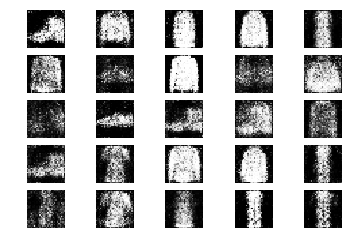

1951 [D loss: 0.666512, acc.: 60.94%] [G loss: 0.960775]
1952 [D loss: 0.644155, acc.: 60.94%] [G loss: 1.004016]
1953 [D loss: 0.703558, acc.: 56.25%] [G loss: 0.962363]
1954 [D loss: 0.583610, acc.: 67.19%] [G loss: 1.000036]
1955 [D loss: 0.612280, acc.: 64.06%] [G loss: 1.019935]
1956 [D loss: 0.609061, acc.: 67.19%] [G loss: 1.015071]
1957 [D loss: 0.536183, acc.: 75.00%] [G loss: 0.948105]
1958 [D loss: 0.678344, acc.: 62.50%] [G loss: 0.971363]
1959 [D loss: 0.579495, acc.: 70.31%] [G loss: 0.907821]
1960 [D loss: 0.628430, acc.: 65.62%] [G loss: 0.849608]
1961 [D loss: 0.635352, acc.: 64.06%] [G loss: 0.886483]
1962 [D loss: 0.547760, acc.: 75.00%] [G loss: 0.966524]
1963 [D loss: 0.649590, acc.: 56.25%] [G loss: 0.913726]
1964 [D loss: 0.591335, acc.: 67.19%] [G loss: 0.848516]
1965 [D loss: 0.585245, acc.: 73.44%] [G loss: 0.955514]
1966 [D loss: 0.572045, acc.: 68.75%] [G loss: 1.044747]
1967 [D loss: 0.680208, acc.: 60.94%] [G loss: 0.991406]
1968 [D loss: 0.614342, acc.: 6

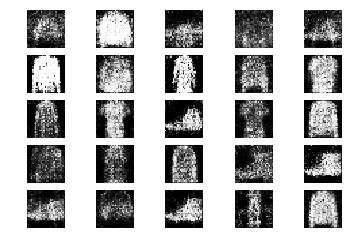

2001 [D loss: 0.638470, acc.: 64.06%] [G loss: 0.992653]
2002 [D loss: 0.626967, acc.: 68.75%] [G loss: 1.015270]
2003 [D loss: 0.618133, acc.: 65.62%] [G loss: 0.988877]
2004 [D loss: 0.627866, acc.: 62.50%] [G loss: 0.998028]
2005 [D loss: 0.614056, acc.: 67.19%] [G loss: 0.884122]
2006 [D loss: 0.545670, acc.: 76.56%] [G loss: 0.956490]
2007 [D loss: 0.626086, acc.: 62.50%] [G loss: 1.023472]
2008 [D loss: 0.616078, acc.: 60.94%] [G loss: 1.009060]
2009 [D loss: 0.578994, acc.: 71.88%] [G loss: 0.955140]
2010 [D loss: 0.601002, acc.: 67.19%] [G loss: 1.008281]
2011 [D loss: 0.559806, acc.: 71.88%] [G loss: 1.057867]
2012 [D loss: 0.585360, acc.: 65.62%] [G loss: 0.943432]
2013 [D loss: 0.637131, acc.: 64.06%] [G loss: 0.977185]
2014 [D loss: 0.583740, acc.: 68.75%] [G loss: 0.929684]
2015 [D loss: 0.659603, acc.: 65.62%] [G loss: 0.812018]
2016 [D loss: 0.609093, acc.: 67.19%] [G loss: 0.880205]
2017 [D loss: 0.608407, acc.: 70.31%] [G loss: 0.933420]
2018 [D loss: 0.637850, acc.: 6

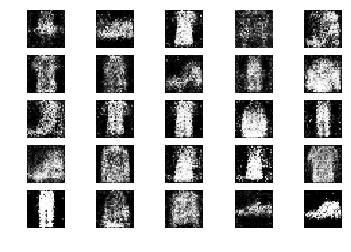

2051 [D loss: 0.670682, acc.: 54.69%] [G loss: 0.919808]
2052 [D loss: 0.735001, acc.: 57.81%] [G loss: 0.984756]
2053 [D loss: 0.529712, acc.: 79.69%] [G loss: 1.081953]
2054 [D loss: 0.594875, acc.: 65.62%] [G loss: 0.929254]
2055 [D loss: 0.580214, acc.: 78.12%] [G loss: 1.024815]
2056 [D loss: 0.594131, acc.: 73.44%] [G loss: 0.967696]
2057 [D loss: 0.651630, acc.: 65.62%] [G loss: 0.897728]
2058 [D loss: 0.666745, acc.: 56.25%] [G loss: 0.949969]
2059 [D loss: 0.591687, acc.: 70.31%] [G loss: 0.940170]
2060 [D loss: 0.566870, acc.: 70.31%] [G loss: 1.023461]
2061 [D loss: 0.642383, acc.: 59.38%] [G loss: 1.024082]
2062 [D loss: 0.645863, acc.: 60.94%] [G loss: 0.923411]
2063 [D loss: 0.566689, acc.: 64.06%] [G loss: 0.891560]
2064 [D loss: 0.624805, acc.: 64.06%] [G loss: 0.947579]
2065 [D loss: 0.643187, acc.: 54.69%] [G loss: 0.954128]
2066 [D loss: 0.654378, acc.: 62.50%] [G loss: 0.974159]
2067 [D loss: 0.655805, acc.: 57.81%] [G loss: 0.936108]
2068 [D loss: 0.550762, acc.: 7

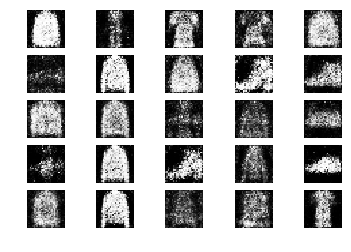

2101 [D loss: 0.603712, acc.: 70.31%] [G loss: 1.030976]
2102 [D loss: 0.605258, acc.: 67.19%] [G loss: 1.050465]
2103 [D loss: 0.559170, acc.: 68.75%] [G loss: 1.073170]
2104 [D loss: 0.671614, acc.: 57.81%] [G loss: 0.954411]
2105 [D loss: 0.650746, acc.: 59.38%] [G loss: 0.961173]
2106 [D loss: 0.585954, acc.: 65.62%] [G loss: 1.012724]
2107 [D loss: 0.575620, acc.: 64.06%] [G loss: 0.966605]
2108 [D loss: 0.660723, acc.: 62.50%] [G loss: 0.990090]
2109 [D loss: 0.546782, acc.: 78.12%] [G loss: 0.977054]
2110 [D loss: 0.585170, acc.: 71.88%] [G loss: 1.018512]
2111 [D loss: 0.555059, acc.: 75.00%] [G loss: 1.025131]
2112 [D loss: 0.607240, acc.: 65.62%] [G loss: 1.078851]
2113 [D loss: 0.604942, acc.: 65.62%] [G loss: 1.014999]
2114 [D loss: 0.579223, acc.: 68.75%] [G loss: 1.027762]
2115 [D loss: 0.586666, acc.: 65.62%] [G loss: 0.983155]
2116 [D loss: 0.593200, acc.: 75.00%] [G loss: 0.941098]
2117 [D loss: 0.549209, acc.: 78.12%] [G loss: 1.065379]
2118 [D loss: 0.599031, acc.: 6

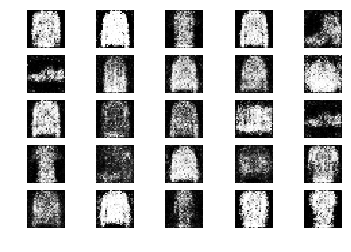

2151 [D loss: 0.616736, acc.: 60.94%] [G loss: 1.075818]
2152 [D loss: 0.602700, acc.: 73.44%] [G loss: 1.081803]
2153 [D loss: 0.613690, acc.: 60.94%] [G loss: 0.988073]
2154 [D loss: 0.622637, acc.: 62.50%] [G loss: 0.956468]
2155 [D loss: 0.610277, acc.: 56.25%] [G loss: 0.924569]
2156 [D loss: 0.565180, acc.: 73.44%] [G loss: 0.975274]
2157 [D loss: 0.625449, acc.: 60.94%] [G loss: 0.984535]
2158 [D loss: 0.555125, acc.: 73.44%] [G loss: 1.002601]
2159 [D loss: 0.615389, acc.: 68.75%] [G loss: 1.015075]
2160 [D loss: 0.643634, acc.: 62.50%] [G loss: 1.056670]
2161 [D loss: 0.637638, acc.: 53.12%] [G loss: 1.036661]
2162 [D loss: 0.525571, acc.: 84.38%] [G loss: 1.080807]
2163 [D loss: 0.622925, acc.: 64.06%] [G loss: 1.001623]
2164 [D loss: 0.642156, acc.: 64.06%] [G loss: 1.040946]
2165 [D loss: 0.728439, acc.: 56.25%] [G loss: 0.925793]
2166 [D loss: 0.547418, acc.: 73.44%] [G loss: 1.072094]
2167 [D loss: 0.636548, acc.: 56.25%] [G loss: 0.890458]
2168 [D loss: 0.624857, acc.: 6

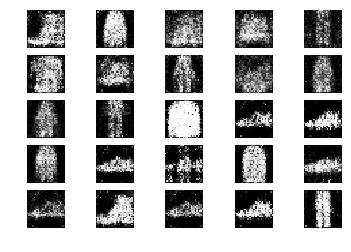

2201 [D loss: 0.646410, acc.: 56.25%] [G loss: 1.059604]
2202 [D loss: 0.606987, acc.: 67.19%] [G loss: 0.963643]
2203 [D loss: 0.679888, acc.: 59.38%] [G loss: 0.965486]
2204 [D loss: 0.706641, acc.: 57.81%] [G loss: 0.994061]
2205 [D loss: 0.614292, acc.: 62.50%] [G loss: 0.983763]
2206 [D loss: 0.592134, acc.: 71.88%] [G loss: 1.016160]
2207 [D loss: 0.598782, acc.: 65.62%] [G loss: 1.000897]
2208 [D loss: 0.649628, acc.: 60.94%] [G loss: 0.934187]
2209 [D loss: 0.615179, acc.: 60.94%] [G loss: 0.838372]
2210 [D loss: 0.586896, acc.: 68.75%] [G loss: 1.001719]
2211 [D loss: 0.656016, acc.: 53.12%] [G loss: 0.885288]
2212 [D loss: 0.649730, acc.: 68.75%] [G loss: 0.911150]
2213 [D loss: 0.651614, acc.: 60.94%] [G loss: 1.009535]
2214 [D loss: 0.636559, acc.: 59.38%] [G loss: 0.934547]
2215 [D loss: 0.653191, acc.: 64.06%] [G loss: 0.904518]
2216 [D loss: 0.605475, acc.: 73.44%] [G loss: 0.896879]
2217 [D loss: 0.616273, acc.: 70.31%] [G loss: 0.995153]
2218 [D loss: 0.587837, acc.: 7

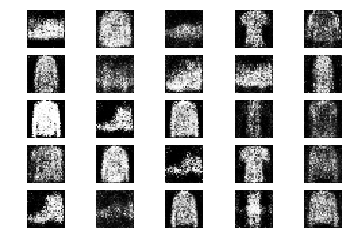

2251 [D loss: 0.586785, acc.: 67.19%] [G loss: 0.961392]
2252 [D loss: 0.599139, acc.: 67.19%] [G loss: 1.046940]
2253 [D loss: 0.530382, acc.: 71.88%] [G loss: 1.000332]
2254 [D loss: 0.608375, acc.: 62.50%] [G loss: 1.092579]
2255 [D loss: 0.656241, acc.: 60.94%] [G loss: 1.022107]
2256 [D loss: 0.729511, acc.: 45.31%] [G loss: 0.894632]
2257 [D loss: 0.613678, acc.: 59.38%] [G loss: 0.969071]
2258 [D loss: 0.646631, acc.: 57.81%] [G loss: 0.977053]
2259 [D loss: 0.594439, acc.: 71.88%] [G loss: 0.924318]
2260 [D loss: 0.567689, acc.: 79.69%] [G loss: 0.964329]
2261 [D loss: 0.618585, acc.: 65.62%] [G loss: 0.962087]
2262 [D loss: 0.604674, acc.: 68.75%] [G loss: 1.084792]
2263 [D loss: 0.607568, acc.: 67.19%] [G loss: 1.010626]
2264 [D loss: 0.593029, acc.: 62.50%] [G loss: 0.966086]
2265 [D loss: 0.695715, acc.: 62.50%] [G loss: 0.992145]
2266 [D loss: 0.622842, acc.: 62.50%] [G loss: 1.006243]
2267 [D loss: 0.553325, acc.: 76.56%] [G loss: 0.920286]
2268 [D loss: 0.631899, acc.: 6

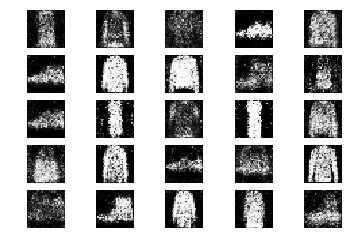

2301 [D loss: 0.555897, acc.: 71.88%] [G loss: 0.922764]
2302 [D loss: 0.604879, acc.: 71.88%] [G loss: 0.939242]
2303 [D loss: 0.569163, acc.: 71.88%] [G loss: 0.934101]
2304 [D loss: 0.688586, acc.: 51.56%] [G loss: 0.886612]
2305 [D loss: 0.645035, acc.: 64.06%] [G loss: 0.976933]
2306 [D loss: 0.651339, acc.: 62.50%] [G loss: 1.045393]
2307 [D loss: 0.590657, acc.: 65.62%] [G loss: 0.850542]
2308 [D loss: 0.597668, acc.: 71.88%] [G loss: 0.900874]
2309 [D loss: 0.565613, acc.: 70.31%] [G loss: 1.029006]
2310 [D loss: 0.660936, acc.: 60.94%] [G loss: 0.958472]
2311 [D loss: 0.575530, acc.: 68.75%] [G loss: 0.949822]
2312 [D loss: 0.608139, acc.: 65.62%] [G loss: 0.940057]
2313 [D loss: 0.619853, acc.: 64.06%] [G loss: 0.952045]
2314 [D loss: 0.608244, acc.: 62.50%] [G loss: 0.970748]
2315 [D loss: 0.631510, acc.: 62.50%] [G loss: 0.997399]
2316 [D loss: 0.570102, acc.: 68.75%] [G loss: 0.940298]
2317 [D loss: 0.586729, acc.: 67.19%] [G loss: 1.067007]
2318 [D loss: 0.670776, acc.: 5

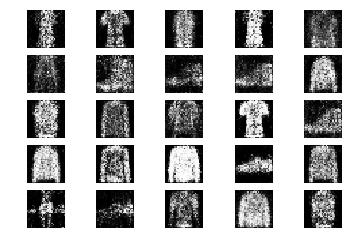

2351 [D loss: 0.622279, acc.: 60.94%] [G loss: 0.968801]
2352 [D loss: 0.615464, acc.: 59.38%] [G loss: 0.956530]
2353 [D loss: 0.599877, acc.: 71.88%] [G loss: 0.899834]
2354 [D loss: 0.612269, acc.: 59.38%] [G loss: 1.035317]
2355 [D loss: 0.608987, acc.: 67.19%] [G loss: 1.064894]
2356 [D loss: 0.673093, acc.: 57.81%] [G loss: 1.011342]
2357 [D loss: 0.639655, acc.: 57.81%] [G loss: 0.949934]
2358 [D loss: 0.535764, acc.: 79.69%] [G loss: 0.937162]
2359 [D loss: 0.584418, acc.: 64.06%] [G loss: 0.946152]
2360 [D loss: 0.646969, acc.: 60.94%] [G loss: 0.932462]
2361 [D loss: 0.688707, acc.: 56.25%] [G loss: 1.078721]
2362 [D loss: 0.561484, acc.: 73.44%] [G loss: 1.029483]
2363 [D loss: 0.626648, acc.: 57.81%] [G loss: 0.985727]
2364 [D loss: 0.591492, acc.: 75.00%] [G loss: 0.951291]
2365 [D loss: 0.602569, acc.: 67.19%] [G loss: 1.000496]
2366 [D loss: 0.642969, acc.: 64.06%] [G loss: 1.058603]
2367 [D loss: 0.560353, acc.: 71.88%] [G loss: 0.974612]
2368 [D loss: 0.693915, acc.: 5

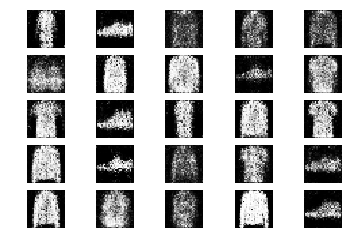

2401 [D loss: 0.637985, acc.: 56.25%] [G loss: 0.883544]
2402 [D loss: 0.660706, acc.: 54.69%] [G loss: 0.886969]
2403 [D loss: 0.566698, acc.: 68.75%] [G loss: 0.910100]
2404 [D loss: 0.567165, acc.: 73.44%] [G loss: 0.980677]
2405 [D loss: 0.559869, acc.: 71.88%] [G loss: 0.974757]
2406 [D loss: 0.690628, acc.: 51.56%] [G loss: 0.989093]
2407 [D loss: 0.558150, acc.: 75.00%] [G loss: 0.953440]
2408 [D loss: 0.545475, acc.: 70.31%] [G loss: 0.994450]
2409 [D loss: 0.628234, acc.: 67.19%] [G loss: 0.914287]
2410 [D loss: 0.662468, acc.: 64.06%] [G loss: 0.884684]
2411 [D loss: 0.626325, acc.: 64.06%] [G loss: 0.969914]
2412 [D loss: 0.641737, acc.: 62.50%] [G loss: 0.985532]
2413 [D loss: 0.544093, acc.: 76.56%] [G loss: 0.979269]
2414 [D loss: 0.591105, acc.: 70.31%] [G loss: 0.994674]
2415 [D loss: 0.615223, acc.: 68.75%] [G loss: 0.957968]
2416 [D loss: 0.602986, acc.: 71.88%] [G loss: 1.018337]
2417 [D loss: 0.560309, acc.: 75.00%] [G loss: 1.050606]
2418 [D loss: 0.623500, acc.: 6

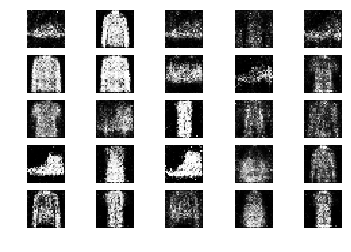

2451 [D loss: 0.641262, acc.: 70.31%] [G loss: 0.986966]
2452 [D loss: 0.643131, acc.: 65.62%] [G loss: 0.916379]
2453 [D loss: 0.607025, acc.: 59.38%] [G loss: 0.940193]
2454 [D loss: 0.649250, acc.: 57.81%] [G loss: 0.930740]
2455 [D loss: 0.588838, acc.: 68.75%] [G loss: 0.902680]
2456 [D loss: 0.626124, acc.: 64.06%] [G loss: 1.067553]
2457 [D loss: 0.544604, acc.: 68.75%] [G loss: 0.954003]
2458 [D loss: 0.626261, acc.: 65.62%] [G loss: 1.151465]
2459 [D loss: 0.590930, acc.: 67.19%] [G loss: 1.077858]
2460 [D loss: 0.587190, acc.: 68.75%] [G loss: 0.980046]
2461 [D loss: 0.664064, acc.: 57.81%] [G loss: 0.959009]
2462 [D loss: 0.619098, acc.: 64.06%] [G loss: 0.931666]
2463 [D loss: 0.671475, acc.: 56.25%] [G loss: 0.869377]
2464 [D loss: 0.593233, acc.: 70.31%] [G loss: 0.818487]
2465 [D loss: 0.629225, acc.: 59.38%] [G loss: 0.906687]
2466 [D loss: 0.614981, acc.: 64.06%] [G loss: 1.020099]
2467 [D loss: 0.587742, acc.: 64.06%] [G loss: 1.043859]
2468 [D loss: 0.646500, acc.: 5

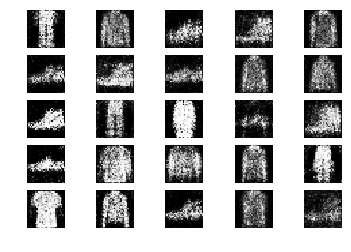

2501 [D loss: 0.534370, acc.: 76.56%] [G loss: 1.045532]
2502 [D loss: 0.644783, acc.: 60.94%] [G loss: 1.053136]
2503 [D loss: 0.654434, acc.: 62.50%] [G loss: 1.088568]
2504 [D loss: 0.537666, acc.: 71.88%] [G loss: 1.147502]
2505 [D loss: 0.652508, acc.: 62.50%] [G loss: 0.967612]
2506 [D loss: 0.626130, acc.: 64.06%] [G loss: 1.028969]
2507 [D loss: 0.601252, acc.: 64.06%] [G loss: 0.903187]
2508 [D loss: 0.514561, acc.: 78.12%] [G loss: 0.990525]
2509 [D loss: 0.635040, acc.: 64.06%] [G loss: 0.933582]
2510 [D loss: 0.652659, acc.: 56.25%] [G loss: 1.028063]
2511 [D loss: 0.635316, acc.: 67.19%] [G loss: 1.014967]
2512 [D loss: 0.612767, acc.: 67.19%] [G loss: 1.035595]
2513 [D loss: 0.678094, acc.: 56.25%] [G loss: 0.991318]
2514 [D loss: 0.583471, acc.: 68.75%] [G loss: 0.922584]
2515 [D loss: 0.617057, acc.: 70.31%] [G loss: 0.972631]
2516 [D loss: 0.522273, acc.: 75.00%] [G loss: 1.037817]
2517 [D loss: 0.557994, acc.: 75.00%] [G loss: 1.125732]
2518 [D loss: 0.669149, acc.: 5

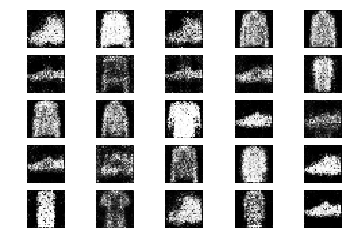

2551 [D loss: 0.602671, acc.: 64.06%] [G loss: 1.011232]
2552 [D loss: 0.629728, acc.: 71.88%] [G loss: 1.039668]
2553 [D loss: 0.656631, acc.: 60.94%] [G loss: 0.886417]
2554 [D loss: 0.585511, acc.: 71.88%] [G loss: 0.985149]
2555 [D loss: 0.593692, acc.: 64.06%] [G loss: 0.953831]
2556 [D loss: 0.644637, acc.: 62.50%] [G loss: 1.001238]
2557 [D loss: 0.637448, acc.: 67.19%] [G loss: 0.943792]
2558 [D loss: 0.625614, acc.: 56.25%] [G loss: 0.963946]
2559 [D loss: 0.627647, acc.: 68.75%] [G loss: 0.924240]
2560 [D loss: 0.712640, acc.: 56.25%] [G loss: 0.908720]
2561 [D loss: 0.626352, acc.: 65.62%] [G loss: 0.894344]
2562 [D loss: 0.623369, acc.: 62.50%] [G loss: 0.885168]
2563 [D loss: 0.721309, acc.: 54.69%] [G loss: 0.822103]
2564 [D loss: 0.544081, acc.: 79.69%] [G loss: 0.868619]
2565 [D loss: 0.598594, acc.: 71.88%] [G loss: 0.953449]
2566 [D loss: 0.625865, acc.: 64.06%] [G loss: 0.923610]
2567 [D loss: 0.650647, acc.: 62.50%] [G loss: 0.995050]
2568 [D loss: 0.675476, acc.: 4

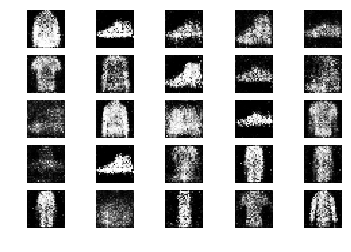

2601 [D loss: 0.584493, acc.: 65.62%] [G loss: 1.026656]
2602 [D loss: 0.644234, acc.: 60.94%] [G loss: 0.929711]
2603 [D loss: 0.745087, acc.: 51.56%] [G loss: 0.956271]
2604 [D loss: 0.639890, acc.: 64.06%] [G loss: 0.985840]
2605 [D loss: 0.664781, acc.: 57.81%] [G loss: 1.061505]
2606 [D loss: 0.602876, acc.: 62.50%] [G loss: 0.913030]
2607 [D loss: 0.566324, acc.: 71.88%] [G loss: 0.998366]
2608 [D loss: 0.683564, acc.: 48.44%] [G loss: 0.867330]
2609 [D loss: 0.632817, acc.: 51.56%] [G loss: 0.928080]
2610 [D loss: 0.707478, acc.: 50.00%] [G loss: 0.980539]
2611 [D loss: 0.573452, acc.: 70.31%] [G loss: 1.006269]
2612 [D loss: 0.598234, acc.: 60.94%] [G loss: 1.024628]
2613 [D loss: 0.561034, acc.: 71.88%] [G loss: 1.046864]
2614 [D loss: 0.590924, acc.: 70.31%] [G loss: 0.941875]
2615 [D loss: 0.653261, acc.: 60.94%] [G loss: 0.946046]
2616 [D loss: 0.551409, acc.: 73.44%] [G loss: 0.909738]
2617 [D loss: 0.659153, acc.: 62.50%] [G loss: 0.864263]
2618 [D loss: 0.554076, acc.: 8

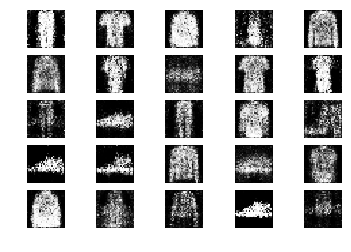

2651 [D loss: 0.583588, acc.: 71.88%] [G loss: 0.994812]
2652 [D loss: 0.588236, acc.: 65.62%] [G loss: 1.099824]
2653 [D loss: 0.514518, acc.: 78.12%] [G loss: 0.947251]
2654 [D loss: 0.634059, acc.: 64.06%] [G loss: 0.949341]
2655 [D loss: 0.632874, acc.: 67.19%] [G loss: 1.109996]
2656 [D loss: 0.645356, acc.: 64.06%] [G loss: 1.049974]
2657 [D loss: 0.593909, acc.: 65.62%] [G loss: 1.023606]
2658 [D loss: 0.584610, acc.: 73.44%] [G loss: 0.970441]
2659 [D loss: 0.586635, acc.: 73.44%] [G loss: 0.996665]
2660 [D loss: 0.691063, acc.: 57.81%] [G loss: 0.903793]
2661 [D loss: 0.630623, acc.: 64.06%] [G loss: 0.946123]
2662 [D loss: 0.573405, acc.: 67.19%] [G loss: 0.921260]
2663 [D loss: 0.625652, acc.: 59.38%] [G loss: 0.967579]
2664 [D loss: 0.646920, acc.: 57.81%] [G loss: 0.930962]
2665 [D loss: 0.605011, acc.: 67.19%] [G loss: 0.958947]
2666 [D loss: 0.604113, acc.: 67.19%] [G loss: 0.794049]
2667 [D loss: 0.598699, acc.: 65.62%] [G loss: 0.986284]
2668 [D loss: 0.602074, acc.: 5

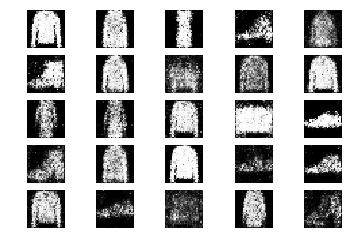

2701 [D loss: 0.526716, acc.: 73.44%] [G loss: 0.934357]
2702 [D loss: 0.699073, acc.: 53.12%] [G loss: 0.919344]
2703 [D loss: 0.633858, acc.: 65.62%] [G loss: 0.919112]
2704 [D loss: 0.614371, acc.: 68.75%] [G loss: 0.968310]
2705 [D loss: 0.597192, acc.: 60.94%] [G loss: 0.979573]
2706 [D loss: 0.550630, acc.: 75.00%] [G loss: 0.949100]
2707 [D loss: 0.673569, acc.: 65.62%] [G loss: 0.870528]
2708 [D loss: 0.637250, acc.: 62.50%] [G loss: 0.945531]
2709 [D loss: 0.679846, acc.: 68.75%] [G loss: 1.071168]
2710 [D loss: 0.586166, acc.: 73.44%] [G loss: 1.083198]
2711 [D loss: 0.660787, acc.: 59.38%] [G loss: 0.815603]
2712 [D loss: 0.636359, acc.: 64.06%] [G loss: 0.931412]
2713 [D loss: 0.690625, acc.: 54.69%] [G loss: 0.942762]
2714 [D loss: 0.688088, acc.: 53.12%] [G loss: 1.021630]
2715 [D loss: 0.692696, acc.: 54.69%] [G loss: 1.008016]
2716 [D loss: 0.589194, acc.: 73.44%] [G loss: 1.035046]
2717 [D loss: 0.597743, acc.: 73.44%] [G loss: 0.935526]
2718 [D loss: 0.546091, acc.: 7

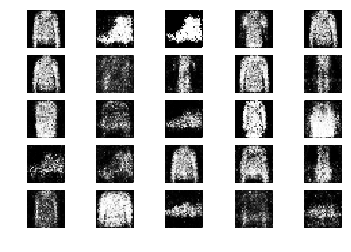

2751 [D loss: 0.547282, acc.: 73.44%] [G loss: 0.898732]
2752 [D loss: 0.573431, acc.: 71.88%] [G loss: 1.002800]
2753 [D loss: 0.627983, acc.: 70.31%] [G loss: 0.893818]
2754 [D loss: 0.613911, acc.: 57.81%] [G loss: 1.025482]
2755 [D loss: 0.605614, acc.: 71.88%] [G loss: 0.918014]
2756 [D loss: 0.648144, acc.: 65.62%] [G loss: 0.853658]
2757 [D loss: 0.615948, acc.: 67.19%] [G loss: 0.907658]
2758 [D loss: 0.572306, acc.: 75.00%] [G loss: 0.960567]
2759 [D loss: 0.583150, acc.: 70.31%] [G loss: 0.955746]
2760 [D loss: 0.595710, acc.: 71.88%] [G loss: 0.994693]
2761 [D loss: 0.595899, acc.: 65.62%] [G loss: 1.069631]
2762 [D loss: 0.620782, acc.: 64.06%] [G loss: 0.956707]
2763 [D loss: 0.663249, acc.: 65.62%] [G loss: 1.015042]
2764 [D loss: 0.636489, acc.: 64.06%] [G loss: 0.865332]
2765 [D loss: 0.604366, acc.: 71.88%] [G loss: 0.870317]
2766 [D loss: 0.582060, acc.: 67.19%] [G loss: 0.908568]
2767 [D loss: 0.636432, acc.: 64.06%] [G loss: 0.865371]
2768 [D loss: 0.592873, acc.: 6

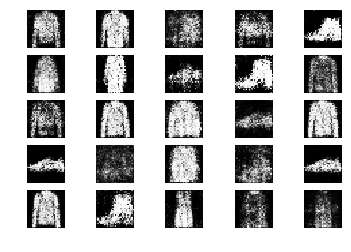

2801 [D loss: 0.558542, acc.: 65.62%] [G loss: 0.930050]
2802 [D loss: 0.639923, acc.: 57.81%] [G loss: 0.995453]
2803 [D loss: 0.623483, acc.: 59.38%] [G loss: 0.949766]
2804 [D loss: 0.593760, acc.: 67.19%] [G loss: 0.943211]
2805 [D loss: 0.621114, acc.: 64.06%] [G loss: 0.964048]
2806 [D loss: 0.573161, acc.: 70.31%] [G loss: 0.861313]
2807 [D loss: 0.669553, acc.: 59.38%] [G loss: 0.949836]
2808 [D loss: 0.605574, acc.: 62.50%] [G loss: 0.952810]
2809 [D loss: 0.693605, acc.: 50.00%] [G loss: 0.920520]
2810 [D loss: 0.616310, acc.: 70.31%] [G loss: 1.009013]
2811 [D loss: 0.627727, acc.: 68.75%] [G loss: 0.948846]
2812 [D loss: 0.647014, acc.: 65.62%] [G loss: 0.989665]
2813 [D loss: 0.564014, acc.: 76.56%] [G loss: 1.013598]
2814 [D loss: 0.601643, acc.: 68.75%] [G loss: 0.972649]
2815 [D loss: 0.550697, acc.: 71.88%] [G loss: 0.904054]
2816 [D loss: 0.570374, acc.: 70.31%] [G loss: 1.053593]
2817 [D loss: 0.669433, acc.: 60.94%] [G loss: 1.063379]
2818 [D loss: 0.631759, acc.: 6

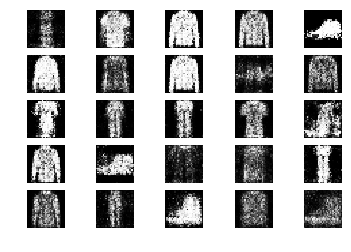

2851 [D loss: 0.573964, acc.: 68.75%] [G loss: 1.010885]
2852 [D loss: 0.627566, acc.: 70.31%] [G loss: 1.002718]
2853 [D loss: 0.576164, acc.: 68.75%] [G loss: 1.064897]
2854 [D loss: 0.669952, acc.: 67.19%] [G loss: 1.019899]
2855 [D loss: 0.714183, acc.: 57.81%] [G loss: 0.998980]
2856 [D loss: 0.620717, acc.: 56.25%] [G loss: 1.027599]
2857 [D loss: 0.591372, acc.: 71.88%] [G loss: 1.070436]
2858 [D loss: 0.606891, acc.: 68.75%] [G loss: 1.012503]
2859 [D loss: 0.590903, acc.: 75.00%] [G loss: 1.029878]
2860 [D loss: 0.593115, acc.: 65.62%] [G loss: 0.920648]
2861 [D loss: 0.714805, acc.: 59.38%] [G loss: 0.831038]
2862 [D loss: 0.578389, acc.: 67.19%] [G loss: 0.890623]
2863 [D loss: 0.681735, acc.: 59.38%] [G loss: 1.056858]
2864 [D loss: 0.632132, acc.: 60.94%] [G loss: 0.976846]
2865 [D loss: 0.643593, acc.: 57.81%] [G loss: 0.891084]
2866 [D loss: 0.593473, acc.: 73.44%] [G loss: 0.921414]
2867 [D loss: 0.602304, acc.: 60.94%] [G loss: 1.007313]
2868 [D loss: 0.612116, acc.: 6

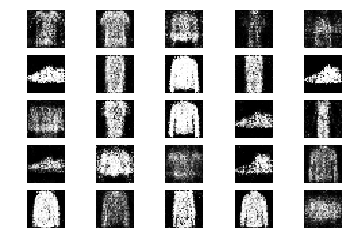

2901 [D loss: 0.584602, acc.: 70.31%] [G loss: 0.931779]
2902 [D loss: 0.595460, acc.: 68.75%] [G loss: 0.903656]
2903 [D loss: 0.641053, acc.: 65.62%] [G loss: 0.956684]
2904 [D loss: 0.568922, acc.: 76.56%] [G loss: 0.991255]
2905 [D loss: 0.615868, acc.: 64.06%] [G loss: 1.003147]
2906 [D loss: 0.558732, acc.: 76.56%] [G loss: 0.967533]
2907 [D loss: 0.619403, acc.: 64.06%] [G loss: 0.997898]
2908 [D loss: 0.647249, acc.: 60.94%] [G loss: 0.910464]
2909 [D loss: 0.687940, acc.: 62.50%] [G loss: 0.905392]
2910 [D loss: 0.629607, acc.: 68.75%] [G loss: 0.930895]
2911 [D loss: 0.664778, acc.: 64.06%] [G loss: 0.940847]
2912 [D loss: 0.561327, acc.: 71.88%] [G loss: 1.096167]
2913 [D loss: 0.689319, acc.: 59.38%] [G loss: 0.946891]
2914 [D loss: 0.632321, acc.: 65.62%] [G loss: 0.972225]
2915 [D loss: 0.685830, acc.: 56.25%] [G loss: 0.955041]
2916 [D loss: 0.614224, acc.: 70.31%] [G loss: 0.939924]
2917 [D loss: 0.672310, acc.: 56.25%] [G loss: 1.007057]
2918 [D loss: 0.590204, acc.: 6

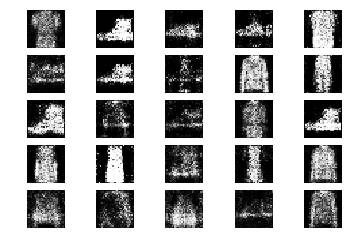

2951 [D loss: 0.672181, acc.: 57.81%] [G loss: 0.934785]
2952 [D loss: 0.649731, acc.: 60.94%] [G loss: 0.972952]
2953 [D loss: 0.536518, acc.: 73.44%] [G loss: 0.918153]
2954 [D loss: 0.603867, acc.: 71.88%] [G loss: 0.913975]
2955 [D loss: 0.695750, acc.: 59.38%] [G loss: 0.996940]
2956 [D loss: 0.611716, acc.: 73.44%] [G loss: 0.932471]
2957 [D loss: 0.605183, acc.: 65.62%] [G loss: 1.049594]
2958 [D loss: 0.598221, acc.: 70.31%] [G loss: 0.991407]
2959 [D loss: 0.606923, acc.: 67.19%] [G loss: 0.984589]
2960 [D loss: 0.614373, acc.: 65.62%] [G loss: 0.992253]
2961 [D loss: 0.582371, acc.: 70.31%] [G loss: 0.936522]
2962 [D loss: 0.592499, acc.: 76.56%] [G loss: 0.944553]
2963 [D loss: 0.638255, acc.: 57.81%] [G loss: 1.010410]
2964 [D loss: 0.658838, acc.: 57.81%] [G loss: 0.874504]
2965 [D loss: 0.572070, acc.: 64.06%] [G loss: 0.964607]
2966 [D loss: 0.617602, acc.: 67.19%] [G loss: 0.880478]
2967 [D loss: 0.634473, acc.: 64.06%] [G loss: 0.976383]
2968 [D loss: 0.698101, acc.: 5

In [0]:
epochs = 3000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

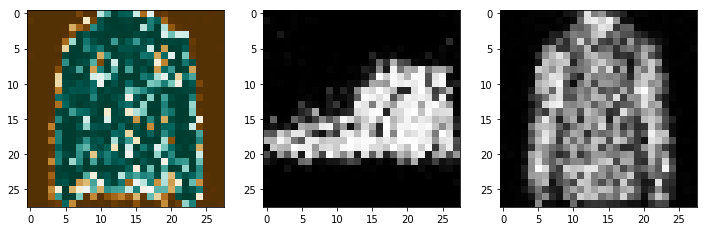

In [0]:
r, c = 3, 3
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='BrBG')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()